## <img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 2
#### Lisandro Robles

***
## Ventanas


<div class="alert alert-block alert-info">
<b>1)</b> Implemente las funciones para generar las siguientes ventanas $w(k)$:

</div>

+ Bartlett ó triangular
+ Hann
+ Blackman
+ Flat-top



In [1]:
#############################################################################
# Importación de paquetes necesarios para la realización del ejercicio # 1  #
#############################################################################

#Paquetes estándar

#Paquete numérico
import numpy as np

#Paquete gráfico
import matplotlib as mpl
import matplotlib.pyplot as plt

#Paquete para manejo de datos
from pandas import DataFrame
from IPython.display import HTML

#Paquetes propios

#Paquete que implementa la clase analizador de espectro
import pdsmodulos.spectrum_analyzer as sa

#Paquete que implemento las funciones generadoras de ventanas
import pdsmodulos.windows as win

In [2]:
################################################
# Parámetros del muestreo para el ejercicio #1 #
################################################

#Cantidad de puntos de la ventana
N1 = np.power(2,10)     

#Cantidad de puntos de la fft (zero pad para ver el espectro)
N2 = np.power(2,20)   

#Frecuencia de muestreo
fs = np.power(2,10)   

In [3]:
#############################################
# Inicialización del analizador de espectro #
#############################################

SA = sa.spectrum_analyzer(fs,N2)

## Ventana rectangular

 Asumiendo que se muestrea $N$ puntos de una señal continua $x(t)$ a una frecuencia de muestreo $f_{s}$ durante un período de tiempo igual a $NT_{s}$, siendo $T_{s} = \frac{1}{f_{s}}$, se tiene que la secuencia dicreta muestreada es:

\begin{equation}
x_{m}[n] = 
     \begin{cases}
       x[n] = x(nT_{s}) \text{,} &\quad\text{si } 0 \leq n \leq N-1\\
       0 \text{,} &\quad\text{si } n < 0\text{ ó } n > N-1 \\ 
     \end{cases}
\end{equation}

Se puede describir a esta operación de generar una secuencia finita $x_{m}[n]$ a partir de muestrar $N$ valores de una señal continua $x(t)$, como al resultado de multiplicar a $x[n] = x(nT_{s})$ por una ventana rectangular $w_{r}[n]$:

\begin{equation}
x_{m}[n] = x[n]w_{k}[n]
\end{equation}

En donde:

\begin{equation}
w_{k}[n] = 
     \begin{cases}
       1 \text{,} &\quad\text{si } 0 \leq n \leq N-1\\
       0 \text{,} &\quad\text{si } n < 0\text{ ó } n > N-1 \\ 
     \end{cases}
\end{equation}

De esto último, puede deducirse como sera el espectro de la señal digitalizada respecto al de la señal continua a partir de las propiedades de la transformada de Fourier:

\begin{equation}
X_{m}[\theta] = \frac{1}{2\pi}(X[\theta]*W_{r}[\theta])
\end{equation}

En donde $|W_{r}[\theta]|$ es un espectro en banda base. Por lo tanto, se tiene que $|X_{m}[\theta]|$ es el resultado de centrar $|W_{r}[\theta]|$ en cada una de las componentes espectrales de $|X[\theta]|$.
A $|W_{r}[\theta]|$ se lo conoce como Kerner de Dirichlet, y tiene la siguiente forma:

In [4]:
##############################
# Generación de las ventanas #
##############################

#Generación de una ventana Rectangular  
wr = win.rectangular(N1)

In [5]:
###############################################
# Generación de los espectros de las ventanas #
###############################################

#Cálculo del espectro de la ventana Rectangular (Kernel de Dirichlet)
(f,Wr) = SA.module(wr,db = True,xaxis = 'phi_norm')

#Divide a la mitad las componentes que no son continua ni Nyquist
#Ya que SA.module devuelve solo la mitad y multiplica estas componentes por dos
n = np.size(Wr,0)
#Para cada uno de las componentes del espectro Wr
for i in range(0,n):
    #Si no es continua ni Nyquist
    if (i is not 0) and (i is not n-1):
        Wr[i] = Wr[i] - 6 #Le resto 6 dB        

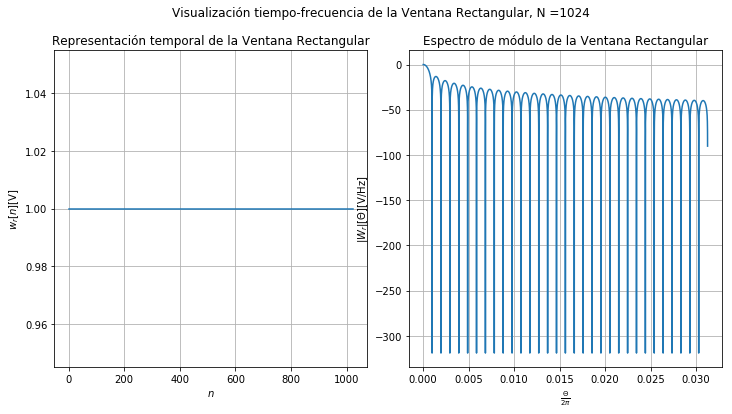

In [6]:
##########################################
# Presentación gráfica de los resultados #
##########################################

plt.figure()
fig, axarr = plt.subplots(1, 2,figsize = (10,5)) 
fig.suptitle('Visualización tiempo-frecuencia de la Ventana Rectangular, N =' + str(N1),fontsize=12,y = 1.08)
fig.tight_layout()

axarr[0].plot(wr)
axarr[0].set_title('Representación temporal de la Ventana Rectangular')
axarr[0].set_ylabel('$w_{r}[n]$[V]')
axarr[0].set_xlabel('$n$')
axarr[0].set_ylim((0,max(wr)*1.1))
axarr[0].axis('tight')
axarr[0].grid()

axarr[1].plot(f[0:int(N2/32)],Wr[0:int(N2/32),0])
axarr[1].set_title('Espectro de módulo de la Ventana Rectangular')
axarr[1].set_ylabel('$|W_{r}|[\Theta]$[V/Hz]')
axarr[1].set_xlabel('$\\frac{\Theta}{2 \pi}$')
axarr[1].axis('tight')
axarr[1].grid()

De observar el espectro se pueden sacar las siguientes conclusiones:

+ El maximo ocurre en el lóbulo princial $ArgMax_{\theta}{|W_{r}[\theta]|}$ = 0.
+ El ancho del lóbulo princial es de $\frac{4\pi}{N}$, coincidiendo con la ubicacion de los primeros ceros $\theta_{o} = \pm \frac{2\pi}{N}$.
+ El resto de los ceros estan en $\theta_{o} = \frac{2m\pi}{N}$, $m = \pm 2, \pm 3,....$ conteniendo entre ellos a los lóbulos secundarios.

Esto tendrá las siguientes consecuencias indeseadas en $|X_{m}[\theta]|$:

+ Dos componentes espectrales de $x_{m}[n]$ separadas $\Delta_{\theta} < \frac{2\pi}{N}$ se superpondran y no podran distinguirse en $|X_{m}[\theta]|$. 
+ Los lóbulos secundarios de la componente espectral principal (o una muy grande) de $x_{m}[n]$ pueden enmascarar otras componentes espectrales más pequeñas.
+ Si no se asegura muestreo sincrónico ($\theta_{o} = m\frac{2\pi}{N}$), se producirá el efecto de Leakage.


Considerando este efecto indeseado de la Ventana Rectangular, y teniendo en cuenta que el mismo siempre estará presente, se puede multiplicar a $x_{m}[n]$ por otra secuencia $w[n]$:

\begin{equation}
x_{m}{'}[n] = x_{m}[n]w[n]
\end{equation}

Propiedades deseadas de esta secuencia son:

+ El lóbulo principal de $|W[\theta]|$ debe ser lo más angosto posible. 
+ Los lóbulos secundarios de $|W[\theta]|$ deben estar lo más atenuados posible respecto al lóbulo principal.
+ Debe ser distina a cero en $n \in [0,N]$ y tener transiciones suaves a $0$ en los bordes para asegurar la periodicidad de $x_{m}{'}[n]$ cada $N$ muestras para que, en caso de no tener muestreo sincrónico, reducir el efecto de Leakage.

## Ventana de Bartlett

La ventana de Bartlett surge como una propuesta para reducir a la mitad (en $dB$) la amplitud de los lóbulos secundarios elevando al cuadrado el espectro del Kernel de Dirichlet . Elevar al cuadrado en el dominio de la frecuencia es equivalente a convolucionar a la ventana rectangular $w_{r}[n]$ por si misma, dando como resultado una funcion triangular:

\begin{equation}
w_{t}[n] = \frac{2}{N+1}(w_{r}[n]*w_{r}[n]) = 1 - \frac{|2n -N + 1|}{N+1} , 0 \leq n < N-1
\end{equation}

En consecuencia, la ventana y su espectro serán los siguientes:

In [7]:
##############################
# Generación de las ventanas #
##############################

#Generación de una ventana de Bartlett  
wt = win.bartlett(N1)

In [8]:
###############################################
# Generación de los espectros de las ventanas #
###############################################

#Cálculo del espectro de la ventana Triangular
(f,Wt) = SA.module(wt,db = True,xaxis = 'phi_norm')

#Divide a la mitad las componentes que no son continua ni Nyquist
#Ya que SA.module devuelve solo la mitad y multiplica estas componentes por dos
n = np.size(Wt,0)
#Para cada uno de las componentes del espectro Wr
for i in range(0,n):
    #Si no es continua ni Nyquist
    if (i is not 0) and (i is not n-1):
        Wt[i] = Wt[i] - 6 #Le resto 6 dB  

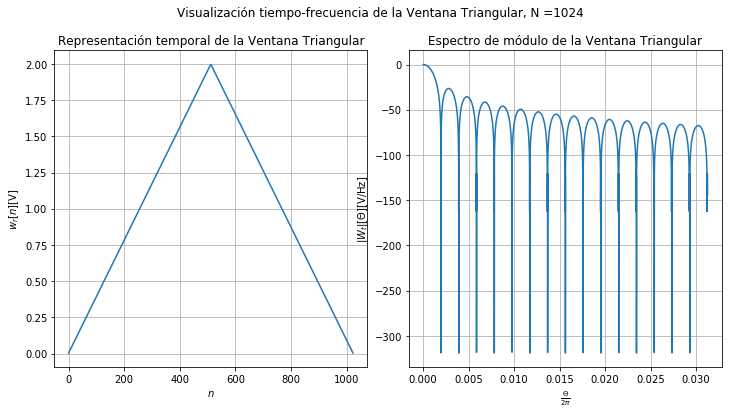

In [9]:
##########################################
# Presentación gráfica de los resultados #
##########################################

plt.figure()
fig, axarr = plt.subplots(1, 2,figsize = (10,5)) 
fig.suptitle('Visualización tiempo-frecuencia de la Ventana Triangular, N =' + str(N1),fontsize=12,y = 1.08)
fig.tight_layout()

axarr[0].plot(wt)
axarr[0].set_title('Representación temporal de la Ventana Triangular')
axarr[0].set_ylabel('$w_{r}[n]$[V]')
axarr[0].set_xlabel('$n$')
axarr[0].set_ylim((0,max(wt)*1.1))
axarr[0].axis('tight')
axarr[0].grid()

axarr[1].plot(f[0:int(N2/32)],Wt[0:int(N2/32),0])
axarr[1].set_title('Espectro de módulo de la Ventana Triangular')
axarr[1].set_ylabel('$|W_{t}|[\Theta]$[V/Hz]')
axarr[1].set_xlabel('$\\frac{\Theta}{2 \pi}$')
axarr[1].axis('tight')
axarr[1].grid()

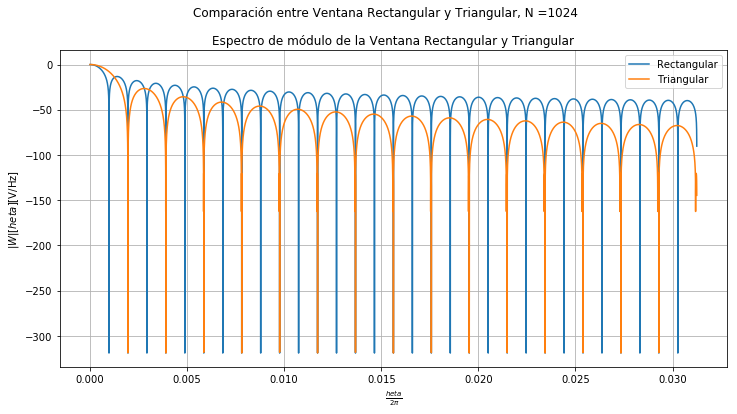

In [10]:
##########################################
# Presentación gráfica de los resultados #
##########################################

plt.figure()
fig, axarr = plt.subplots(1, 1,figsize = (10,5)) 
fig.suptitle('Comparación entre Ventana Rectangular y Triangular, N =' + str(N1),fontsize=12,y = 1.08)
fig.tight_layout()

axarr.plot(f[0:int(N2/32)],Wr[0:int(N2/32),0],f[0:int(N2/32)],Wt[0:int(N2/32),0])
axarr.set_title('Espectro de módulo de la Ventana Rectangular y Triangular')
axarr.set_ylabel('$|W|[\theta]$[V/Hz]')
axarr.set_xlabel('$\\frac{\theta}{2 \pi}$')
axarr.legend(['Rectangular','Triangular'],loc = 'upper right')
axarr.axis('tight')
axarr.grid()

De la comparación de los espectros $W_{r}[\theta]$ y $W_{t}[\theta]$ se puede ver que para una ventana triangular la amplitud de los lóbulos secundarios se ha ha hecho dos veces más pequeña que para una ventana rectangular (en $dB$), lo cuál es deseable. Por otra parte se ve que se ha duplicado el ancho del lóbulo principal, así como el de los lóbulos secundarios. 

## Ventanas cosenoidales

Es una familia de funciones basada en la sumatoria ponderada de funciones cosenoidales armónicas, que estan dadas por la siguiente ecuación en donde $K$ es el orden de la ventana:

\begin{equation}
w[n] = 
     \begin{cases}
       \sum_{k= 0}^{K} (-1)^{k}a_{k}cos\left(\frac{2\pi kn}{N-1}\right), 0 \leq n \leq N-1  \text{,} &\quad\text{si $N$ es impar } \\
       \sum_{k= 0}^{K} (-1)^{k}a_{k}cos\left(\frac{2\pi kn}{N}\right), 0 \leq n \leq N-1  \text{,} &\quad\text{si $N$ es par } \\
     \end{cases}
\end{equation}

A diferencia de la ventana de Barlett que logra la reducción de los lóbulos secundarios mediante el elevamiento al cuadrado del Kernel de Dirichlet, las ventanas cosenoidales de orden $k$ buscan reducirlos mediante la superposicion de $k$ Kernels de Dirichlet desplazados en frecuencia. Para probar esto, tomemos una ventana cosenoidal de grado $k = 1$,que tiene la siguiente forma:

\begin{equation}
w[n] = a_{0} - \left(1-a_{0}\right)cos\left(\frac{2\pi n}{N-1}\right), 0 \leq n \leq N-1 
\end{equation}

La cual puede reescribirse como:

\begin{equation}
w[n] = a_{0} - \left(1-a_{0}\right) \frac{\left(e^{j \left(\frac{2\pi n}{N-1} \right)} + e^{-j \left(\frac{2\pi n}{N-1} \right)} \right)}{2}, 0 \leq n \leq N-1 
\end{equation}

El espectro $W[\theta]$ puede obtenerse como suma de los espectros individuales. La componente $a_{o}$ se transformara en $a_{o}D[\theta]$ mientras que las componentes del tipo $e^{j\phi}$ se traduciran en un desplazamiento frecuencial $D[\theta -\phi]$. Por lo tanto se tendra:

\begin{equation}
W[\theta] = a_{0}D[\theta] - \left(1-a_{0}\right) \frac{\left(D\left[\theta - \frac{2\pi n}{N-1}\right] + D\left[\theta + \frac{2\pi n}{N-1}\right]  \right)}{2}, 0 \leq n \leq N-1 
\end{equation}

Algunos casos particulares de estas ventanas son: Hann, Hamming, Blackman, Blackman-Harris y Flat-Top,etc.


## Ventanas de Hann

En particular, si $a_{0} = 0.5$ se obtiene la ventana de Hann:

\begin{equation}
w[n] = 0.5\left(1 - cos\left(\frac{2\pi n}{N-1}\right)\right) , 0 \leq n \leq N-1 
\end{equation}


In [11]:
##############################
# Generación de las ventanas #
##############################

#Generación de una ventana de Hann
whn = win.hann(N1)

In [12]:
###############################################
# Generación de los espectros de las ventanas #
###############################################

#Cálculo del espectro de la ventana Rectangular (Kernel de Dirichlet)
(f,Whn) = SA.module(whn,db = True,xaxis = 'phi_norm')

#Divide a la mitad las componentes que no son continua ni Nyquist
#Ya que SA.module devuelve solo la mitad y multiplica estas componentes por dos
n = np.size(Whn,0)
#Para cada uno de las componentes del espectro Wr
for i in range(0,n):
    #Si no es continua ni Nyquist
    if (i is not 0) and (i is not n-1):
        Whn[i] = Whn[i] - 6 #Le resto 6 dB  

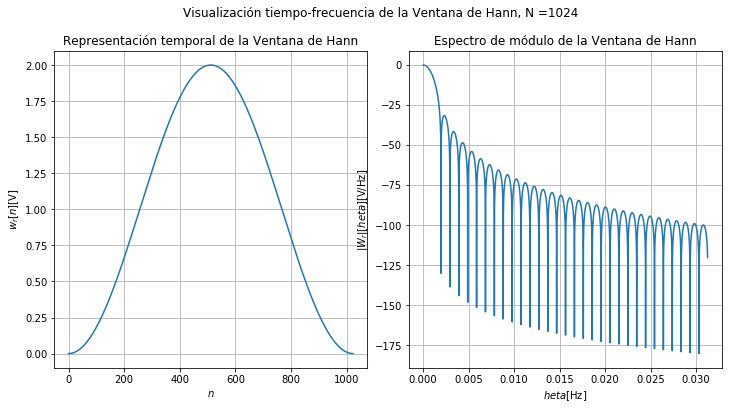

In [13]:
##########################################
# Presentación gráfica de los resultados #
##########################################

plt.figure()
fig, axarr = plt.subplots(1, 2,figsize = (10,5)) 
fig.suptitle('Visualización tiempo-frecuencia de la Ventana de Hann, N =' + str(N1),fontsize=12,y = 1.08)
fig.tight_layout()

axarr[0].plot(whn)
axarr[0].set_title('Representación temporal de la Ventana de Hann')
axarr[0].set_ylabel('$w_{r}[n]$[V]')
axarr[0].set_xlabel('$n$')
axarr[0].set_ylim((0,max(whn)*1.1))
axarr[0].axis('tight')
axarr[0].grid()

axarr[1].plot(f[0:int(N2/32)],Whn[0:int(N2/32),0])
axarr[1].set_title('Espectro de módulo de la Ventana de Hann')
axarr[1].set_ylabel('$|W_{r}|[\theta]$[V/Hz]')
axarr[1].set_xlabel('$\theta$[Hz]')
axarr[1].axis('tight')
axarr[1].grid()

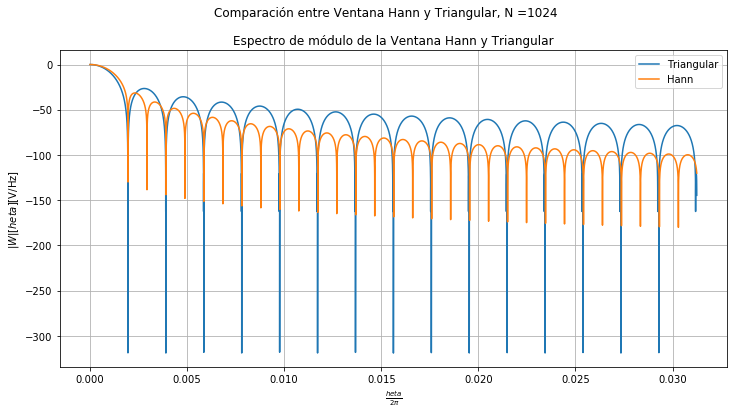

In [14]:
##########################################
# Presentación gráfica de los resultados #
##########################################

plt.figure()
fig, axarr = plt.subplots(1, 1,figsize = (10,5)) 
fig.suptitle('Comparación entre Ventana Hann y Triangular, N =' + str(N1),fontsize=12,y = 1.08)
fig.tight_layout()

axarr.plot(f[0:int(N2/32)],Wt[0:int(N2/32),0],f[0:int(N2/32)],Whn[0:int(N2/32),0])
axarr.set_title('Espectro de módulo de la Ventana Hann y Triangular')
axarr.set_ylabel('$|W|[\theta]$[V/Hz]')
axarr.set_xlabel('$\\frac{\theta}{2 \pi}$')
axarr.legend(['Triangular','Hann'],loc = 'upper right')
axarr.axis('tight')
axarr.grid()

De la comparación de los espectros $W_{t}[\theta]$ y $W_{hn}[\theta]$ se puede ver que para una ventana de Hann la amplitud de los lóbulos secundarios se ha reducido respecto a la ventana triangular (en $dB$), lo cuál es deseable. Por otra parte se ve que el ancho del lóbulo principal se ha mantenido igual, mientras que el ancho de los lóbulos secundarios se ha reducido a la mitad.

## Ventanas de Hamming

La ventana de Hamming se obtiene mediante una pequeña modificación de la ventana de Hann, con $a_{0} = 0.54$:

\begin{equation}
w[n] = 0.54 - 0.46cos \left(\frac{2\pi n}{N-1}\right), 0 \leq n \leq N-1 
\end{equation}

Los valores $0.54$ y $0.46$ fueron obtenidos por prueba y error con el objetivo de minimizar la amplitud del primer lóbulo secundario.

In [15]:
#Generación de una ventana de Hamming
whm = win.hamming(N1)

In [16]:
###############################################
# Generación de los espectros de las ventanas #
###############################################

#Cálculo del espectro de la ventana Rectangular (Kernel de Dirichlet)
(f,Whm) = SA.module(whm,db = True,xaxis = 'phi_norm')

#Divide a la mitad las componentes que no son continua ni Nyquist
#Ya que SA.module devuelve solo la mitad y multiplica estas componentes por dos
n = np.size(Whm,0)
#Para cada uno de las componentes del espectro Wr
for i in range(0,n):
    #Si no es continua ni Nyquist
    if (i is not 0) and (i is not n-1):
        Whm[i] = Whm[i] - 6 #Le resto 6 dB  

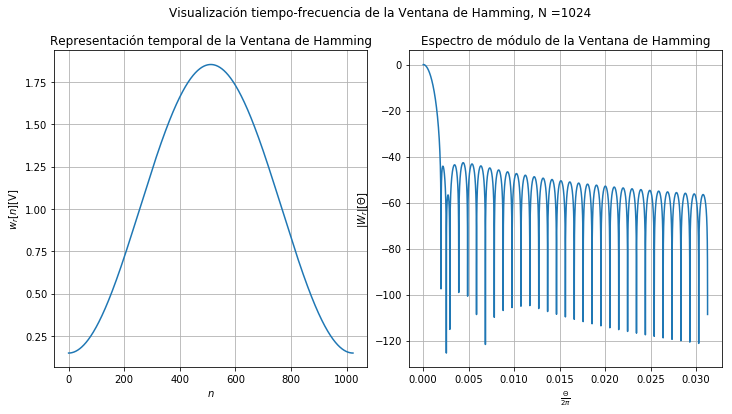

In [17]:
##########################################
# Presentación gráfica de los resultados #
##########################################

plt.figure()
fig, axarr = plt.subplots(1, 2,figsize = (10,5)) 
fig.suptitle('Visualización tiempo-frecuencia de la Ventana de Hamming, N =' + str(N1),fontsize=12,y = 1.08)
fig.tight_layout()

axarr[0].plot(whm)
axarr[0].set_title('Representación temporal de la Ventana de Hamming')
axarr[0].set_ylabel('$w_{r}[n]$[V]')
axarr[0].set_xlabel('$n$')
axarr[0].set_ylim((0,max(whm)*1.1))
axarr[0].axis('tight')
axarr[0].grid()

axarr[1].plot(f[0:int(N2/32)],Whm[0:int(N2/32),0])
axarr[1].set_title('Espectro de módulo de la Ventana de Hamming')
axarr[1].set_ylabel('$|W_{r}|[\Theta]$')
axarr[1].set_xlabel('$\\frac{\Theta}{2 \pi}$')
axarr[1].axis('tight')
axarr[1].grid()

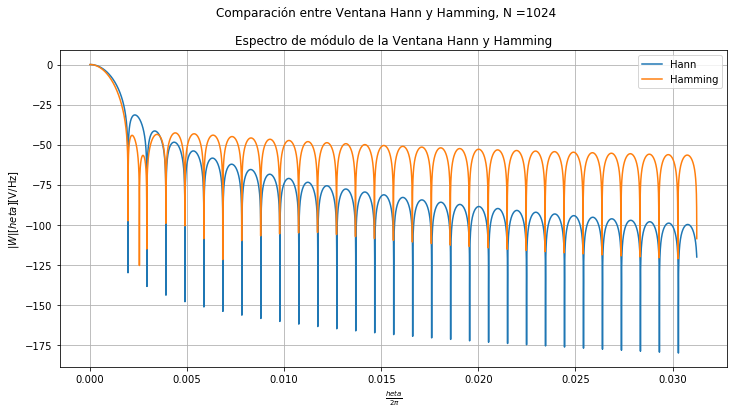

In [18]:
##########################################
# Presentación gráfica de los resultados #
##########################################

plt.figure()
fig, axarr = plt.subplots(1, 1,figsize = (10,5)) 
fig.suptitle('Comparación entre Ventana Hann y Hamming, N =' + str(N1),fontsize=12,y = 1.08)
fig.tight_layout()

axarr.plot(f[0:int(N2/32)],Whn[0:int(N2/32),0],f[0:int(N2/32)],Whm[0:int(N2/32),0])
axarr.set_title('Espectro de módulo de la Ventana Hann y Hamming')
axarr.set_ylabel('$|W|[\theta]$[V/Hz]')
axarr.set_xlabel('$\\frac{\theta}{2 \pi}$')
axarr.legend(['Hann','Hamming'],loc = 'upper right')
axarr.axis('tight')
axarr.grid()

De la comparación de los espectros $W_{hn}[\theta]$ y $W_{hm}[\theta]$ se puede ver que para una ventana de Hamming se ha generado un cero en el primer lóbulo secundario mientras que el resto de los lóbulos secundarios tienen mayor amplitud respecto a la ventana de Hann. Por otra parte se ve que el ancho del lóbulo principal y de los secundarios se ha mantenido constante.

## Ventana de Blackman

La ventana de Blackman es una ventana cosenoidal de grado $K = 2$ con la siguiente expresión:

\begin{equation}
w[n] = 0.42 - 0.5cos \left(\frac{2\pi n}{N-1}\right) + 0.08cos \left(\frac{4\pi n}{N-1}\right), 0 \leq n \leq N-1 
\end{equation}



In [19]:
#Generación de una ventana Blackman    
wb = win.blackman(N1)

In [20]:
#Cálculo del espectro de la ventana de Blackman
(f,Wb) = SA.module(wb,db = True,xaxis = 'phi_norm')

#Divide a la mitad las componentes que no son continua ni Nyquist
#Ya que SA.module devuelve solo la mitad y multiplica estas componentes por dos
n = np.size(Wb,0)
#Para cada uno de las componentes del espectro Wr
for i in range(0,n):
    #Si no es continua ni Nyquist
    if (i is not 0) and (i is not n-1):
        Wb[i] = Wb[i] - 6 #Le resto 6 dB  

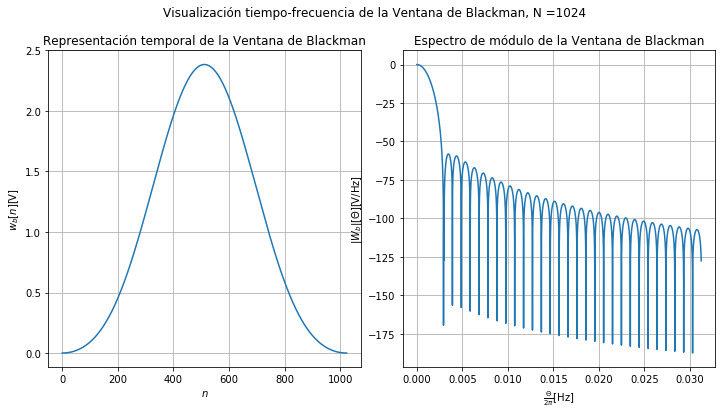

In [21]:
##########################################
# Presentación gráfica de los resultados #
##########################################

plt.figure()
fig, axarr = plt.subplots(1, 2,figsize = (10,5)) 
fig.suptitle('Visualización tiempo-frecuencia de la Ventana de Blackman, N =' + str(N1),fontsize=12,y = 1.08)
fig.tight_layout()

axarr[0].plot(wb)
axarr[0].set_title('Representación temporal de la Ventana de Blackman')
axarr[0].set_ylabel('$w_{b}[n]$[V]')
axarr[0].set_xlabel('$n$')
axarr[0].set_ylim((0,max(wb)*1.1))
axarr[0].axis('tight')
axarr[0].grid()

axarr[1].plot(f[0:int(N2/32)],Wb[0:int(N2/32),0])
axarr[1].set_title('Espectro de módulo de la Ventana de Blackman')
axarr[1].set_ylabel('$|W_{b}|[\Theta]$[V/Hz]')
axarr[1].set_xlabel('$\\frac{\Theta}{2 \pi}$[Hz]')
axarr[1].axis('tight')
axarr[1].grid()

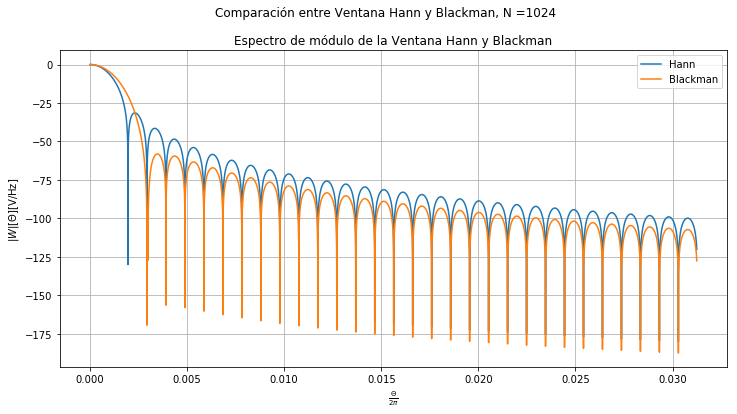

In [22]:
##########################################
# Presentación gráfica de los resultados #
##########################################

plt.figure()
fig, axarr = plt.subplots(1, 1,figsize = (10,5)) 
fig.suptitle('Comparación entre Ventana Hann y Blackman, N =' + str(N1),fontsize=12,y = 1.08)
fig.tight_layout()

axarr.plot(f[0:int(N2/32)],Whn[0:int(N2/32),0],f[0:int(N2/32)],Wb[0:int(N2/32),0])
axarr.set_title('Espectro de módulo de la Ventana Hann y Blackman')
axarr.set_ylabel('$|W|[\Theta]$[V/Hz]')
axarr.set_xlabel('$\\frac{\Theta}{2 \pi}$')
axarr.legend(['Hann','Blackman'],loc = 'upper right')
axarr.axis('tight')
axarr.grid()

De la comparación de los espectros $W_{hn}[\theta]$ y $W_{b}[\theta]$ se puede ver que para una ventana de de Blackman se ha reducido la amplitud de los lóbulos secundarios.Por otra parte se ve que ha aumentado el ancho del lóbulo principal asi como se ha hecho más lenta su transición.

## Ventana Flat-Top

La ventana Flat-Top es una ventana cosenoidal de grado $K = 4$ con la siguiente expresión:

\begin{equation}
w[n] = 1-1.93cos \left(\frac{2\pi n}{N-1}\right)+1.29cos \left(\frac{4\pi n}{N-1}\right)-0.388cos \left(\frac{6\pi n}{N-1}\right)+0.028cos \left(\frac{8\pi n}{N-1}\right), 0 \leq n \leq N-1 
\end{equation}

In [23]:
#Generación de una ventana Flat-Top    
wft = win.flattop(N1)

In [24]:
#Calculo del espectro de la ventana Flat-Top
(f,Wft) = SA.module(wft,db = True,xaxis = 'phi_norm')

#Divide a la mitad las componentes que no son continua ni Nyquist
#Ya que SA.module devuelve solo la mitad y multiplica estas componentes por dos
n = np.size(Wft,0)
#Para cada uno de las componentes del espectro Wr
for i in range(0,n):
    #Si no es continua ni Nyquist
    if (i is not 0) and (i is not n-1):
        Wft[i] = Wft[i] - 6 #Le resto 6 dB  

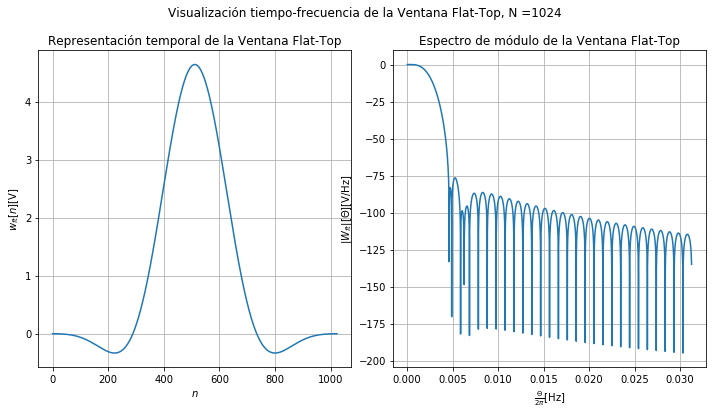

In [25]:
##########################################
# Presentación gráfica de los resultados #
##########################################

plt.figure()
fig, axarr = plt.subplots(1, 2,figsize = (10,5)) 
fig.suptitle('Visualización tiempo-frecuencia de la Ventana Flat-Top, N =' + str(N1),fontsize=12,y = 1.08)
fig.tight_layout()

axarr[0].plot(wft)
axarr[0].set_title('Representación temporal de la Ventana Flat-Top')
axarr[0].set_ylabel('$w_{ft}[n]$[V]')
axarr[0].set_xlabel('$n$')
axarr[0].axis('tight')
axarr[0].grid()

axarr[1].plot(f[0:int(N2/32)],Wft[0:int(N2/32),0])
axarr[1].set_title('Espectro de módulo de la Ventana Flat-Top')
axarr[1].set_ylabel('$|W_{ft}|[\Theta]$[V/Hz]')
axarr[1].set_xlabel('$\\frac{\Theta}{2 \pi}$[Hz]')
axarr[1].axis('tight')
axarr[1].grid()

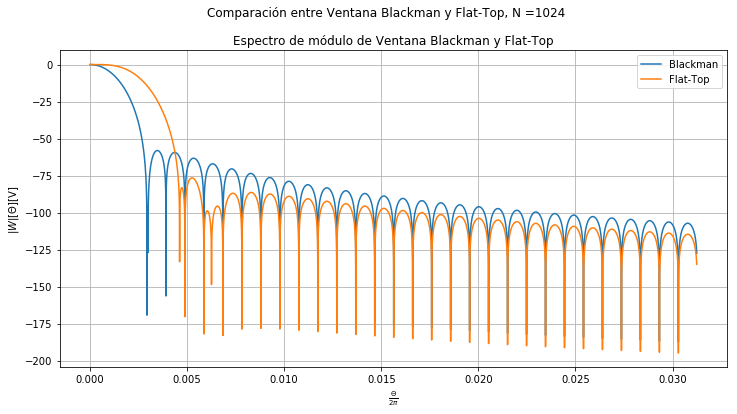

In [26]:
##########################################
# Presentación gráfica de los resultados #
##########################################

plt.figure()
fig, axarr = plt.subplots(1, 1,figsize = (10,5)) 
fig.suptitle('Comparación entre Ventana Blackman y Flat-Top, N =' + str(N1),fontsize=12,y = 1.08)
fig.tight_layout()

axarr.plot(f[0:int(N2/32)],Wb[0:int(N2/32),0],f[0:int(N2/32)],Wft[0:int(N2/32),0])
axarr.set_title('Espectro de módulo de Ventana Blackman y Flat-Top')
axarr.set_ylabel('$|W|[\Theta]$[V]')
axarr.set_xlabel('$\\frac{\Theta}{2 \pi}$')
axarr.legend(['Blackman','Flat-Top'],loc = 'upper right')
axarr.axis('tight')
axarr.grid()

De la comparación de los espectros $W_{b}[\theta]$ y $W_{ft}[\theta]$ se puede ver que para una ventana de de Flat-Top ha aumentado el ancho del lóbulo principal asi como se ha hecho más lenta su transición.

## Conclusiones

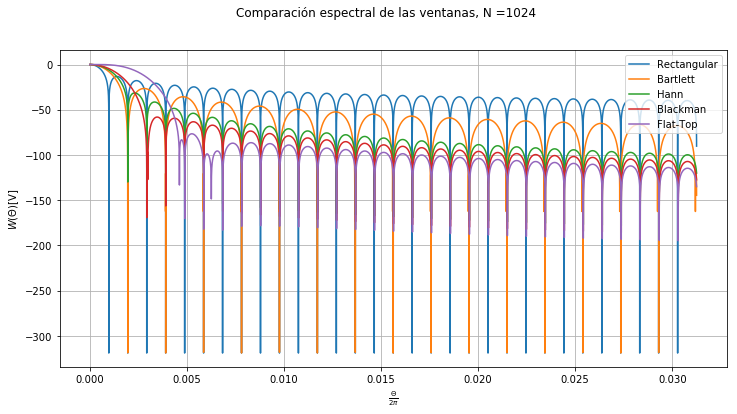

In [27]:
############################################################
# Presentación gráfica de los resultados todos en uno solo #
############################################################

plt.figure()
fig, axarr = plt.subplots(1, 1,figsize = (10,5)) 
fig.suptitle('Comparación espectral de las ventanas, N =' + str(N1),fontsize=12,y = 1.08)
fig.tight_layout()

axarr.plot(f[0:int(N2/32)],Wr[0:int(N2/32),0],f[0:int(N2/32)],Wt[0:int(N2/32),0],f[0:int(N2/32)],Whn[0:int(N2/32),0],f[0:int(N2/32)],Wb[0:int(N2/32),0],f[0:int(N2/32)],Wft[0:int(N2/32),0])
#axarr[0].set_title('Representación temporal de la Ventana Rectangular')
axarr.set_ylabel('$W(\Theta)$[V]')
axarr.set_xlabel('$\\frac{\Theta}{2 \pi}$')
axarr.legend(['Rectangular','Bartlett','Hann','Blackman','Flat-Top'],loc = 'upper right')
axarr.axis('tight')
axarr.grid()


A fin de extraer conclusiones, se ha realizado una tabla comparativa con los siguientes valores para cada tipo de ventana:

+ $\Omega_{0}$: Frecuencia del primer cero.
+ $\Omega_{1}$: Frecuencia en la que la amplitud del lóbulo principal cae $3 dB$.  
+ $W_{1}$: Amplitud del lóbulo principal. 
+ $W_{2}$: Amplitud del máximo lóbulo secundario.

In [28]:
##############################################
# Cálculo del ancho de banda de las ventanas #
##############################################

#Se almacenaran los resultados para el dataframe

tus_resultados = []

#Lista donde se almacenara el ancho de banda de cada ventana
B = []

#Itero en todos los elementos de W
#W contiene es una lista con los espectros de todas las ventanas analizadas hasta ahora

W = [Wr,Wt,Whn,Whm,Wb,Wft]

for Wi in W:
    Bi = 0
    type(Wi)
    W1 = Wi[0,0] - 3  #Le resto 3 porque esta en dB
    #print('Valor de -3 dB: ' + str(W1) + ' dB')
    for i in range(np.size(f,0)):
        if Wi[int(i),0] <= W1:
            #print(Wi[int(i),0])
            #print(f[i,0])
            Bi = f[i,0]
            break
    B.append(Bi)

In [29]:
########################################
# Cálculo del lobulo secundario maximo #
########################################

#Lista donde se almacenara el valor maximo de los lobulos secundarios
W2 = []

#Almaceno los primeros ceros para cada ventana
Z1 = []

#Itero en todos los elementos de W
#W contiene es una lista con los espectros de todas las ventanas analizadas hasta ahora

W = [Wr,Wt,Whn,Whm,Wb,Wft]

for Wi in W:
    Z1i = 0
    for i in range(1,np.size(f,0)):
        if (Wi[int(i),0] < Wi[int(i-1),0]) and (Wi[int(i),0] < Wi[int(i+1),0]) :
            #print(Wi[int(i),0])
            #print(f[i,0])
            Z1i = i
            break
    W2.append(max(Wi[Z1i:,0]))
    Z1.append(f[Z1i,0])

In [30]:
for Z1i,Bi,W2i in zip(Z1,B,W2):
    tus_resultados.append([str(Z1i),str(Bi),str(W2i)])

In [31]:

#######################################
# Tu simulación que genere resultados #
#######################################

df = DataFrame(tus_resultados, columns=['$\Omega_{0}$ (#)','$\Omega_{1}$ (#)', '$W_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Hamming',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$\Omega_{0}$ (#),$\Omega_{1}$ (#),$W_2$ (dB)
Rectangular,0.0009765625,0.000433921813965,-13.2408368665
Bartlett,0.00194931030273,0.00062370300293,-26.5022653839
Hann,0.00195503234863,0.000705718994141,-31.4467079409
Hamming,0.00195693969727,0.000638008117676,-42.6535732825
Blackman,0.00293254852295,0.000804901123047,-58.0882488059
Flat-top,0.00461292266846,0.00182628631592,-76.5965812047


Con el objetivo de clarificar y evidenciar estas conclusiones se han normalizado los parámetros de la tabla anterior respecto a la ventana rectangular. Es decir, cuando no se ventanea.

In [36]:
#Los resultados que se almacenaran en resultados se normalizaran respecto al caso de no ventanear
Z1norm = (Z1)/(Z1[0])
Bnorm = (B)/(B[0])
W2norm = (W2) - W2[0]

tus_resultados = []
for Z1i,Bi,W2i in zip(Z1norm,Bnorm,W2norm):
    tus_resultados.append([str(Z1i),str(Bi),str(W2i)])

In [37]:
#######################################
# Tu simulación que genere resultados #
#######################################

df = DataFrame(tus_resultados, columns=['$\Omega_{0}$ (#)','$\Omega_{1}$ (#)', '$W_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Hamming',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$\Omega_{0}$ (#),$\Omega_{1}$ (#),$W_2$ (dB)
Rectangular,1.0,1.0,0.0
Bartlett,1.99609375,1.43736263736,-13.2614285174
Hann,2.001953125,1.62637362637,-18.2058710744
Hamming,2.00390625,1.47032967033,-29.412736416
Blackman,3.0029296875,1.85494505495,-44.8474119394
Flat-top,4.7236328125,4.20879120879,-63.3557443382


La tabla anterior debe interpretarse de la siguiente manera:

+ $\Omega$: Tanto para $\Omega_{0}$ como para $\Omega_{1}$,para una determinada ventana, debe interpretarse que ese ancho de banda es tantas veces más grande que en el caso de no ventanear.
+ $W_{2}$: Para una determinada ventana, debe interpretarse que la amplitud del máximo lóbulo secundario esta tantos $dB$ por debajo que el máximo lóbulo secundario en el caso de no ventanear.

Además, podemos extraer las siguientes conclusiones:

+ $\Omega_{1}$: La ventana rectangular es la que menor ancho de banda tiene. Le siguen las ventanas Triangular, de Hann y de Hamming que duplican el ancho de banda. La ventana de Blackman y la Flat-Top triplican y cuadruplican el ancho de banda de la triangular, respectivamente.
+ $W_{2}$:La ventana Flat-Top es la que mejor atenua los lobulos secundarios mientras que la rectangular es la peor.

<div class="alert alert-block alert-info">
<b>2)</b> Genere una señal bitonal de las siguientes características
</div>


  $  x(k) = x_1(k) + x_2(k) $

  $  x_1(k) = sen(\Omega_1·k)$

  $  x_2(k) = a_2 · sen(\Omega_2·k)   $

siendo 

  $\Omega_1 = \frac{\pi}{2}$

  $\Omega_2 = \Omega_1 + 10·\frac{2\pi}{N}$

  $a_2 = -40$ dB


Responda a las siguientes consignas:

<div class="alert alert-block alert-info">
<b>2.a)</b>  Calcule el espectro $ \lvert X(\Omega) \rvert $

</div>

In [42]:
##################################################
# Paquetes necesarios para hacer el ejercicio #2 #
##################################################

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal.windows as win

import pdsmodulos.signal_generator as gen
import pdsmodulos.spectrum_analyzer as sa
import pdsmodulos.statistic as sta
import pdsmodulos.adc as converter
import pdsmodulos.windows as window

#Paquete para manejo de datos
from pandas import DataFrame
from IPython.display import HTML


In [43]:
###########################
# Parámetros del muestreo #
###########################

#Frecuencia de muestreo
fs = 1024

#Cantidad de muestras
N = 1024

In [44]:
#############################################
# Inicialización del generador de funciones #
#############################################

#Instancia la clase signal_generator
generador = gen.signal_generator(fs,N)

In [45]:
##################################
# Generación de la señal bitonal #
##################################

#Amplitud de x1(t)
a1 = 1

#Frecuencia de x1(t) (en unidades de radianes)
f1 = np.pi/2
#f1 = 10*(2*np.pi/N)

#Fase de x1(t)
p1 = 0

#Generación de x1(t)
(t,x1) = generador.sinewave(a1,f1,p1,freq = 'normalized_frequency')

#Amplitud de x2(t)
#Se genera a partir de un parametro k1 que indica cuantos dB por debajo estará de x1(t)
k1 = 40
a2o = (np.power(10,-k1/20))
a2 = a1*a2o

#Frecuencia de x2(t)
#Se genera como f1 + un desvio de n bines
n = 10
fd = n*(2*np.pi/N)
f2 = f1 + fd

#Fase de x2(t)
p2 = 0

#Generación de x2(t)
(t,x2) = generador.sinewave(a2,f2,p2,freq = 'normalized_frequency')

#Generación de la señal bitonal x(t) = x1(t) + x2(t)
x = x1 + x2

In [46]:
#############################################
# Inicialización del analizador de espectro #
#############################################

#Instancia la clase spectrum_analyzer
analizador = sa.spectrum_analyzer(fs,N,"fft")

In [47]:
#######################################
# Cálculo del espectro de las señales #
#######################################

#Espectro de x(t)
(f,X) = analizador.module(x,db = True,xaxis = 'phi')

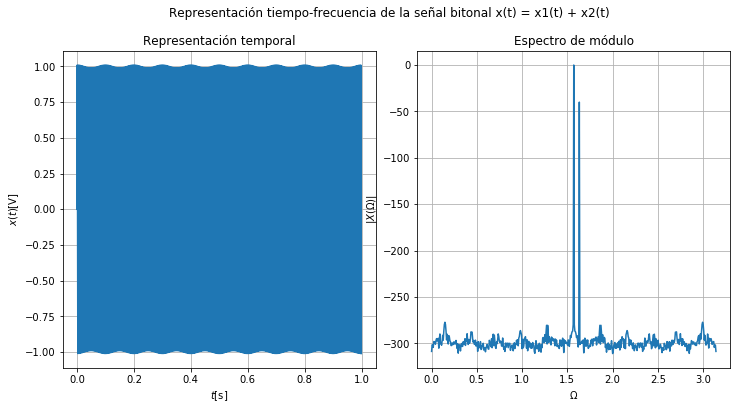

In [48]:
######################################
# Presentación gráfica de resultados #
######################################

fig, axarr = plt.subplots(1, 2,figsize = (10,5)) 
fig.suptitle('Representación tiempo-frecuencia de la señal bitonal x(t) = x1(t) + x2(t)',fontsize=12,y = 1.08)
fig.tight_layout()

axarr[0].plot(t,x)
axarr[0].set_title('Representación temporal')
axarr[0].set_ylabel('$x(t)$[V]')
axarr[0].set_xlabel('$t$[s]')
axarr[0].axis('tight')
axarr[0].grid()

axarr[1].plot(f,X)
axarr[1].set_title('Espectro de módulo')
axarr[1].set_ylabel('$|X(\Omega)|$')
axarr[1].set_xlabel('$\\Omega$')
axarr[1].axis('tight')
axarr[1].grid()

<div class="alert alert-block alert-info">
<b>2.b)</b> Repita a) disminuyendo la amplitud de $x_2$.
</div>

In [49]:
########################################
# Modificación de la amplitud de x2(t) #
########################################

#Nueva amplitud de x2(t)
#Se genera a partir de un parametro k1 que indica cuantos dB por debajo estará de x1(t)
k1 = 200
a2o = (np.power(10,-k1/20))
a2 = a1*a2o

#Generación de la nueva x2(t)
(t,x2) = generador.sinewave(a2,f2,p2,freq = 'normalized_frequency')

#Generación de la nueva x(t)

x = x1 + x2

#Espectro de la nueva x(t)
(f,X) = analizador.module(x,db = True,xaxis = 'phi')

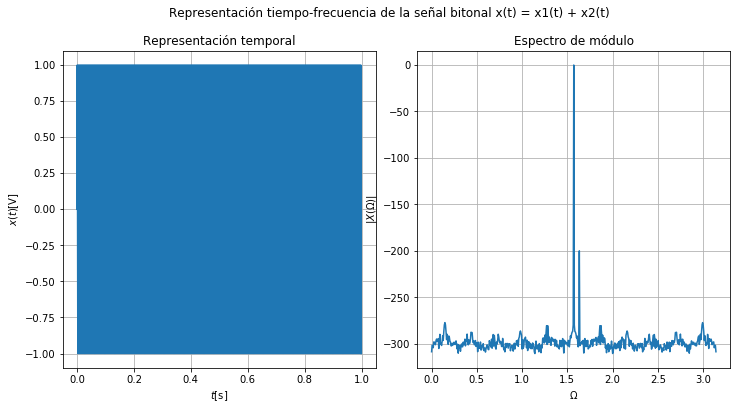

In [50]:
######################################
# Presentación gráfica de resultados #
######################################

fig, axarr = plt.subplots(1, 2,figsize = (10,5)) 
fig.suptitle('Representación tiempo-frecuencia de la señal bitonal x(t) = x1(t) + x2(t)',fontsize=12,y = 1.08)
fig.tight_layout()

axarr[0].plot(t,x)
axarr[0].set_title('Representación temporal')
axarr[0].set_ylabel('$x(t)$[V]')
axarr[0].set_xlabel('$t$[s]')
axarr[0].axis('tight')
axarr[0].grid()

axarr[1].plot(f,X)
axarr[1].set_title('Espectro de módulo')
axarr[1].set_ylabel('$|X(\Omega)|$')
axarr[1].set_xlabel('$\\Omega$')
axarr[1].axis('tight')
axarr[1].grid()

¿Cuál es el factor de escala mínimo de $x_2$, definido como $a^0_2$, que permite evidenciar su existencia en el espectro de $\lvert X(\Omega) \rvert$ ?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Se observa que el factor de escala mínimo $a_{2}{0}$ que permite distinguir a $x_{2}(t)$ en el espectro de $|X(\Omega)|$ es aquel valor tal que la amplitud de $x_{2}$ sea aproximadamente $-280 dB$.
</div>

In [51]:
########################################
# Modificación de la amplitud de x2(t) #
########################################

#Nueva amplitud de x2(t)
#Se genera a partir de un parametro k1 que indica cuantos dB por debajo estará de x1(t)
k1 = 280
a2o = (np.power(10,-k1/20))
a2 = a1*a2o

#Generación de la nueva x2(t)
(t,x2) = generador.sinewave(a2,f2,p2,freq = 'normalized_frequency')

#Generación de la nueva x(t)

x = x1 + x2

#Espectro de la nueva x(t)
(f,X) = analizador.module(x,db = True,xaxis = 'phi')

a2o = 1e-14


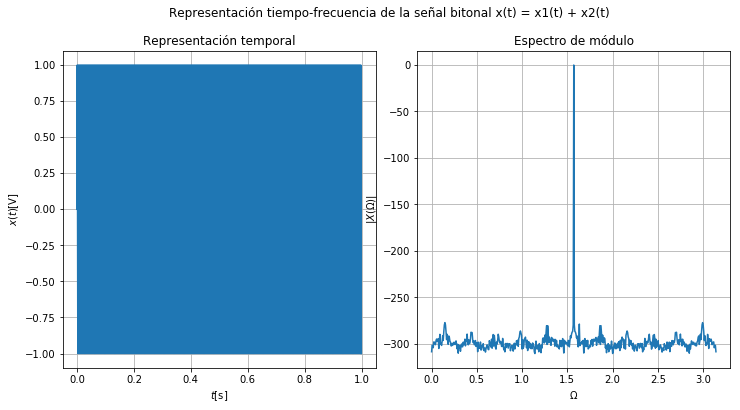

In [52]:
######################################
# Presentación gráfica de resultados #
######################################

fig, axarr = plt.subplots(1, 2,figsize = (10,5)) 
fig.suptitle('Representación tiempo-frecuencia de la señal bitonal x(t) = x1(t) + x2(t)',fontsize=12,y = 1.08)
fig.tight_layout()

axarr[0].plot(t,x)
axarr[0].set_title('Representación temporal')
axarr[0].set_ylabel('$x(t)$[V]')
axarr[0].set_xlabel('$t$[s]')
axarr[0].axis('tight')
axarr[0].grid()

axarr[1].plot(f,X)
axarr[1].set_title('Espectro de módulo')
axarr[1].set_ylabel('$|X(\Omega)|$')
axarr[1].set_xlabel('$\\Omega$')
axarr[1].axis('tight')
axarr[1].grid()

print('a2o = ' + str(a2o))

¿De qué depende poder medir $x_2$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Poder medir a $x_{2}$ depende del piso de ruido que se tenga. En el caso anterior, la señal de bitonal no tenía ruido analógico ni de cuantización, por lo que el piso de ruido estaba determinado por la precisión del punto flotante.
</div>

Considere ahora que esta señal proviene de un ADC de 16 bits. Incorpore al análisis el correspondiente ruido de cuantización. ¿Cómo afecta esta situación la medición de $x_2$?

In [53]:
########################################
# Modificación de la amplitud de x2(t) #
########################################

#Amplitud de x1(t)
a1 = 1

#Frecuencia de x1(t) (en unidades de radianes)
f1 = np.pi/2
#f1 = 10*(2*np.pi/N)

#Fase de x1(t)
p1 = 0

#Generación de x1(t)
(t,x1) = generador.sinewave(a1,f1,p1,freq = 'normalized_frequency')

#Amplitud de x2(t)
#Se genera a partir de un parametro k1 que indica cuantos dB por debajo estará de x1(t)
k1 = 40
a2o = (np.power(10,-k1/20))
a2 = a1*a2o

#Frecuencia de x2(t)
#Se genera como f1 + un desvio de n bines
n = 10
fd = n*(2*np.pi/N)
f2 = f1 + fd

#Fase de x2(t)
p2 = 0

#Generación de x2(t)
(t,x2) = generador.sinewave(a2,f2,p2,freq = 'normalized_frequency')

#Generación de la señal bitonal x(t) = x1(t) + x2(t)
x = x1 + x2

#Espectro de la nueva x(t)
(f,X) = analizador.module(x,db = True,xaxis = 'phi')

In [54]:
#############################
# Parametros del ADC        #
#############################

n = 16 #Cantidad de bits para los que se hara la simulación 
Vref_high = 1 #Las Vref del ADC se han elegido para medir a plena escala 
Vref_low = -1 #una senoidal de energía normalizada
fs = 1024 #Frecuencia de muestreo, debe ser menor a la frecuencia de muestreo "continua"
N = 1024 #Cantidad de muestras

In [55]:
########################################
# Inicializo el ADC                    #
########################################

ADC = converter.adc(fs,Vref_low,Vref_high,n)

In [56]:
########################################
# Simulo la cuantificación del ADC     #
########################################

#Normalizo la señal bitonal para que entre en el rango dinamico y no se sature
x = (x*(ADC.C_max*ADC.q))/(max(np.abs(x)))
#Cuantifico la señal muestreada
(t,xq) = ADC.cuantizar(t,x)

#Espectro de la nueva xq(t)
(f,Xq) = analizador.module(xq,db = True,xaxis = 'phi')

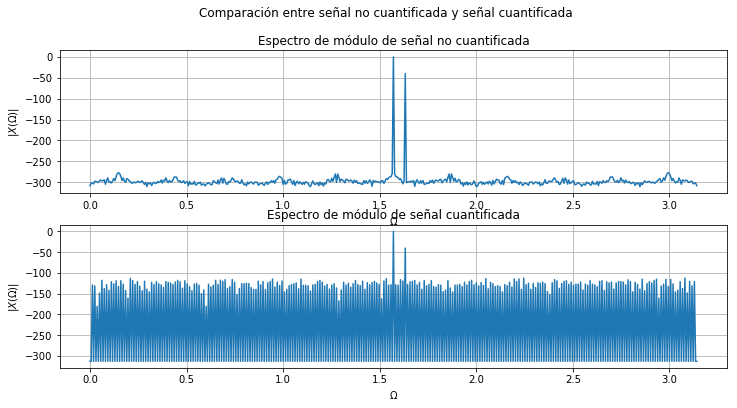

In [57]:
######################################
# Presentación gráfica de resultados #
######################################

fig, axarr = plt.subplots(2, 1,figsize = (10,5)) 
fig.suptitle('Comparación entre señal no cuantificada y señal cuantificada',fontsize=12,y = 1.08)
fig.tight_layout()

axarr[0].plot(f,X)
axarr[0].set_title('Espectro de módulo de señal no cuantificada')
axarr[0].set_ylabel('$|X(\Omega)|$')
axarr[0].set_xlabel('$\\Omega$')
axarr[0].axis('tight')
axarr[0].grid()

axarr[1].plot(f,Xq)
axarr[1].set_title('Espectro de módulo de señal cuantificada')
axarr[1].set_ylabel('$|X(\Omega)|$')
axarr[1].set_xlabel('$\\Omega$')
axarr[1].axis('tight')
axarr[1].grid()


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Al cuantificar la señal, el piso de ruido estará determinado por el ruido de cuantificación. Por ejemplo, para un ADC de $16$ bits no se podrá distinguir una componente $x_{2}$ por debajo de los, aproximadamente, $120 dB$
</div>

<div class="alert alert-block alert-info">
<b>2.c)</b> Repita a) incrementando la frecuencia de $x_1$ para $\Omega_1 = \frac{\pi}{2} + d_1·\frac{2\pi}{N}$ para valores de $d_1 = (0,01; 0.25; 0.5)$. Aumente la amplitud de $a_2$ hasta que se evidencie sobre el leakage y construya una tabla con dicho valor para las 3 situaciones correspondientes a desintonías leve, moderada y máxima.
</div>

In [85]:
tus_resultados = []

En principio se buscará el valor mínimo de $a_{2}$ que permita distinguir a $x_{2}$ en el caso de muestreo sincrónico, observando que no se la podrá distinguir en el caso que haya desintonía.

In [86]:
#########################
# Modificación de x1(t) #
#########################

#Parametros de x1(t)
a1 = 1
fo = np.pi/2
p1 = 0
d1 = [0,0.01,0.25,0.5]

#Parametros de x2(t)
#Se genera a partir de un parametro k1 que indica cuantos dB por debajo estará de x1(t)
k1 = 260
a2o = (np.power(10,-k1/20))
a2 = a1*a2o
f2 = fo + 10*((2*np.pi)/N)
p2 = 0

#Para un cierto valor de a2o
#Lista donde se almacenaran los espectros
X = []
#Generación de la ventana x2(t)
(t,x2) = generador.sinewave(a2,f2,p2,freq = 'normalized_frequency')
#Para cada una de las desintonias de x1(t)
for d1i in d1:
    
    #Frecuencia incremental de x1(t) para esta desintonia
    f1 = fo + d1i*((2*np.pi)/N)
    #Generacion de x1(t) para esta desintonia
    (t,x1) = generador.sinewave(a1,f1,p1,freq = 'normalized_frequency')
    #Generacion de la bitonal para esta desintonia
    xi = x1 + x2
    #Espectro de la nueva x(t) para esta desintonia
    (f,Xi) = analizador.module(xi,db = True,xaxis = 'phi')
    #Agrego el espectro actual a la lista de resultados
    X.append(Xi)

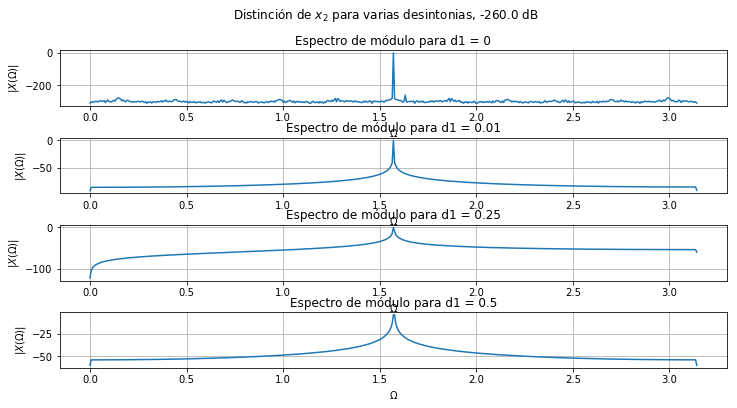

In [87]:
fig, axarr = plt.subplots(4, 1,figsize = (10,5)) 
fig.suptitle('Distinción de $x_{2}$ para varias desintonias, ' + str(20*np.log10(a2)) + ' dB',fontsize=12,y = 1.08)
fig.tight_layout()

i = 0
for Xi,d1i in zip(X,d1):
    axarr[i].plot(f,Xi)
    axarr[i].set_title('Espectro de módulo para d1 = ' + str(d1i))
    axarr[i].set_ylabel('$|X(\Omega)|$')
    axarr[i].set_xlabel('$\\Omega$')
    axarr[i].axis('tight')
    axarr[i].grid()
    i = i + 1

Observamos que para el caso en que $\Omega_{1}$ no presente desintonía, se tiene el caso del inciso $a)$ en donde la componente $x_{2}$ puede distinguirse estando $260 dB$ por debajo de $x_{1}$. Además, se observa que para ninguno de los otros casos de desintonía (leve, moderada o alta) se puede distinguir a la componente de $x_{2}$.

In [88]:
#Almacenamos el resultado para muestreo sincrónico
tus_resultados.append(str(20*np.log10(a2)))

A continuación se buscará el valor mínimo de $a_{2}$ que permita distinguir a $x_{2}$ en el caso de desintonía leve, observando que no se la podrá distinguir en el caso que haya desintonía moderada o maxima.

In [89]:
#########################
# Modificación de x1(t) #
#########################

#Parametros de x1(t)
a1 = 1
fo = np.pi/2
p1 = 0
d1 = [0,0.01,0.25,0.5]

#Parametros de x2(t)
#Se genera a partir de un parametro k1 que indica cuantos dB por debajo estará de x1(t)
k1 = 50
a2o = (np.power(10,-k1/20))
a2 = a1*a2o
f2 = fo + 10*((2*np.pi)/N)
p2 = 0

#Para un cierto valor de a2o
#Lista donde se almacenaran los espectros
X = []
#Generación de la ventana x2(t)
(t,x2) = generador.sinewave(a2,f2,p2,freq = 'normalized_frequency')
#Para cada una de las desintonias de x1(t)
for d1i in d1:
    
    #Frecuencia incremental de x1(t) para esta desintonia
    f1 = fo + d1i*((2*np.pi)/N)
    #Generacion de x1(t) para esta desintonia
    (t,x1) = generador.sinewave(a1,f1,p1,freq = 'normalized_frequency')
    #Generacion de la bitonal para esta desintonia
    xi = x1 + x2
    #Espectro de la nueva x(t) para esta desintonia
    (f,Xi) = analizador.module(xi,db = True,xaxis = 'phi')
    #Agrego el espectro actual a la lista de resultados
    X.append(Xi)

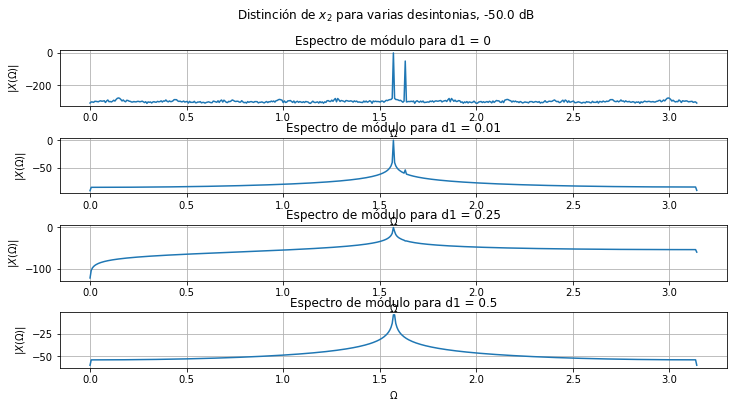

In [90]:
fig, axarr = plt.subplots(4, 1,figsize = (10,5)) 
fig.suptitle('Distinción de $x_{2}$ para varias desintonias, ' + str(20*np.log10(a2)) + ' dB',fontsize=12,y = 1.08)
fig.tight_layout()

i = 0
for Xi,d1i in zip(X,d1):
    axarr[i].plot(f,Xi)
    axarr[i].set_title('Espectro de módulo para d1 = ' + str(d1i))
    axarr[i].set_ylabel('$|X(\Omega)|$')
    axarr[i].set_xlabel('$\\Omega$')
    axarr[i].axis('tight')
    axarr[i].grid()
    i = i + 1

Observamos que para el caso en que $d_{1} = 0.01$, $x_{2}$ puede distinguirse estando $50 dB$ por debajo de $x_{1}$.Tambien, para valores de $ -75dB \geq a_{2} \leq -55dB$ $x_{2}$ evidenciara sobre el leakege como una muesca en $\Omega_{2}$.

In [91]:
#Almacenamos el resultado para muestreo sincrónico
tus_resultados.append(str(20*np.log10(a2)))

A continuación se buscará el valor mínimo de $a_{2}$ que permita distinguir a $x_{2}$ en el caso de desintonía moderada.

In [76]:
#########################
# Modificación de x1(t) #
#########################

#Parametros de x1(t)
a1 = 1
fo = np.pi/2
p1 = 0
d1 = [0,0.01,0.25,0.5]

#Parametros de x2(t)
#Se genera a partir de un parametro k1 que indica cuantos dB por debajo estará de x1(t)
k1 = 25
a2o = (np.power(10,-k1/20))
a2 = a1*a2o
f2 = fo + 10*((2*np.pi)/N)
p2 = 0

#Para un cierto valor de a2o
#Lista donde se almacenaran los espectros
X = []
#Generación de la ventana x2(t)
(t,x2) = generador.sinewave(a2,f2,p2,freq = 'normalized_frequency')
#Para cada una de las desintonias de x1(t)
for d1i in d1:
    
    #Frecuencia incremental de x1(t) para esta desintonia
    f1 = fo + d1i*((2*np.pi)/N)
    #Generacion de x1(t) para esta desintonia
    (t,x1) = generador.sinewave(a1,f1,p1,freq = 'normalized_frequency')
    #Generacion de la bitonal para esta desintonia
    xi = x1 + x2
    #Espectro de la nueva x(t) para esta desintonia
    (f,Xi) = analizador.module(xi,db = True,xaxis = 'phi')
    #Agrego el espectro actual a la lista de resultados
    X.append(Xi)

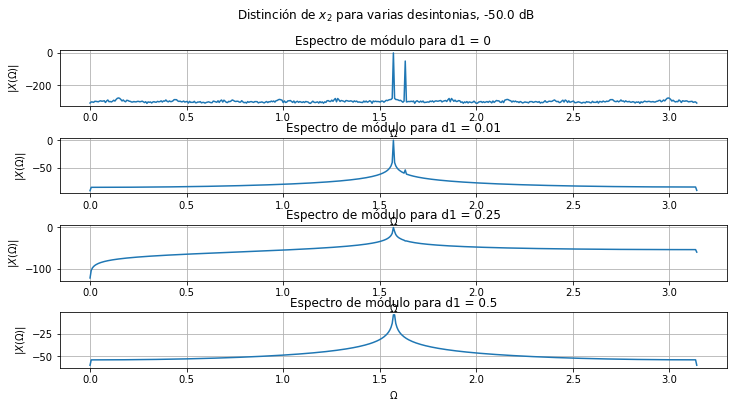

In [92]:
fig, axarr = plt.subplots(4, 1,figsize = (10,5)) 
fig.suptitle('Distinción de $x_{2}$ para varias desintonias, ' + str(20*np.log10(a2)) + ' dB',fontsize=12,y = 1.08)
fig.tight_layout()

i = 0
for Xi,d1i in zip(X,d1):
    axarr[i].plot(f,Xi)
    axarr[i].set_title('Espectro de módulo para d1 = ' + str(d1i))
    axarr[i].set_ylabel('$|X(\Omega)|$')
    axarr[i].set_xlabel('$\\Omega$')
    axarr[i].axis('tight')
    axarr[i].grid()
    i = i + 1

Observamos que para el caso en que $d_{1} = 0.25$, $x_{2}$ puede distinguirse estando $25 dB$ por debajo de $x_{1}$.Tambien, para valores de $ -40dB \geq a_{2} \leq -30dB$ $x_{2}$ seevidenciara sobre el leakege como una muesca en $\Omega_{2}$.

In [93]:
#Almacenamos el resultado para muestreo sincrónico
tus_resultados.append(str(20*np.log10(a2)))

A continuación se buscará el valor mínimo de $a_{2}$ que permita distinguir a $x_{2}$ en el caso de desintonía maxima.

In [94]:
#########################
# Modificación de x1(t) #
#########################

#Parametros de x1(t)
a1 = 1
fo = np.pi/2
p1 = 0
d1 = [0,0.01,0.25,0.5]

#Parametros de x2(t)
#Se genera a partir de un parametro k1 que indica cuantos dB por debajo estará de x1(t)
k1 = 30
a2o = (np.power(10,-k1/20))
a2 = a1*a2o
f2 = fo + 10*((2*np.pi)/N)
p2 = 0

#Para un cierto valor de a2o
#Lista donde se almacenaran los espectros
X = []
#Generación de la ventana x2(t)
(t,x2) = generador.sinewave(a2,f2,p2,freq = 'normalized_frequency')
#Para cada una de las desintonias de x1(t)
for d1i in d1:
    
    #Frecuencia incremental de x1(t) para esta desintonia
    f1 = fo + d1i*((2*np.pi)/N)
    #Generacion de x1(t) para esta desintonia
    (t,x1) = generador.sinewave(a1,f1,p1,freq = 'normalized_frequency')
    #Generacion de la bitonal para esta desintonia
    xi = x1 + x2
    #Espectro de la nueva x(t) para esta desintonia
    (f,Xi) = analizador.module(xi,db = True,xaxis = 'phi')
    #Agrego el espectro actual a la lista de resultados
    X.append(Xi)

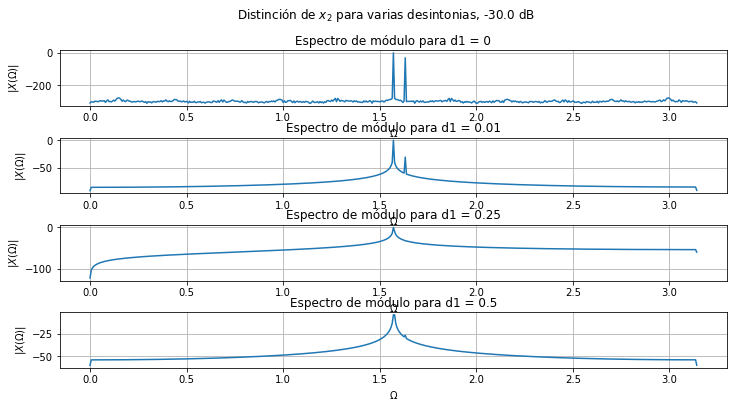

In [95]:
fig, axarr = plt.subplots(4, 1,figsize = (10,5)) 
fig.suptitle('Distinción de $x_{2}$ para varias desintonias, ' + str(20*np.log10(a2)) + ' dB',fontsize=12,y = 1.08)
fig.tight_layout()

i = 0
for Xi,d1i in zip(X,d1):
    axarr[i].plot(f,Xi)
    axarr[i].set_title('Espectro de módulo para d1 = ' + str(d1i))
    axarr[i].set_ylabel('$|X(\Omega)|$')
    axarr[i].set_xlabel('$\\Omega$')
    axarr[i].axis('tight')
    axarr[i].grid()
    i = i + 1

Observamos que para el caso en que $d_{1} = 0.5$, $x_{2}$ puede distinguirse estando $30dB$ por debajo de $x_{1}$.

In [96]:
#Almacenamos el resultado para muestreo sincrónico
tus_resultados.append(str(20*np.log10(a2)))

A continuación se resumiran los resultados en una tabla.

In [97]:
#######################################
# Tu simulación que genere resultados #
#######################################

df = DataFrame(tus_resultados, columns=['$a_2$ (dB)'],
               index=[  
                       'sintonia', 
                       'leve',
                        'moderada',
                        'máxima',
                     ])
HTML(df.to_html())

,$a_2$ (dB)
sintonia,-260.0
leve,-50.0
moderada,-50.0
máxima,-30.0


<div class="alert alert-block alert-info">
<b>2.d)</b> Evalúe el efecto de utilizar las ventanas implementadas en 1). Complete la tabla comparativa con respecto a la ventana rectangular, respecto a las mediciones $a^0_2$ realizada en 2.b); y $a^1_2$ en 2.c) para el caso de desintonía máxima.
</div>

Grafique $\lvert X_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w(k) \} \rvert $ para las 4 ventanas de 1).

In [98]:
#Paquete que implemento las funciones generadoras de ventanas
import pdsmodulos.windows as win

In [111]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

#Listas en las que se almacenaran los resultados

a20 = []
Xw = []

#Genero las ventanas

wr = win.rectangular(N)
wt = win.bartlett(N)
whn = win.hann(N)
wb = win.blackman(N)
wft = win.flattop(N)

w = [wr,wt,whn,wb,wft]

#Parametros de x1(t)
a1 = 1
fo = np.pi/2
p1 = 0
d1 = 0
f1 = d1*((2*np.pi)/N) + fo

#Generación de la ventana x1(t)
(t,x1) = generador.sinewave(a1,f1,p1,freq = 'normalized_frequency')

#Parametros de x2(t)
#Se genera a partir de un parametro k1 que indica cuantos dB por debajo estará de x1(t)
k1 = [260,30,85,95,110]
f2 = fo + 10*((2*np.pi)/N)
p2 = 0

#Para cada una de las ventanas y el a2o correspondiente a esa ventana
for wi,k1i in zip(w,k1):
    
    a2oi = (np.power(10,-k1i/20))
    a2i = a1*a2oi
    
    #Generación de la ventana x2(t)
    (t,x2i) = generador.sinewave(a2i,f2,p2,freq = 'normalized_frequency')
    
    #Generacion de x(t)
    xi = x1 + x2i
    
    #Multiplicacion por la ventana correspondiente
    xwi = xi*wi
    
    #Espectro de la nueva x(t) para esta desintonia
    (f,Xwi) = analizador.module(xwi,db = True,xaxis = 'phi')
    #Agrego el espectro actual a la lista de resultados
    Xw.append(Xwi)
    a20.append(20*np.log10(a2i))
    

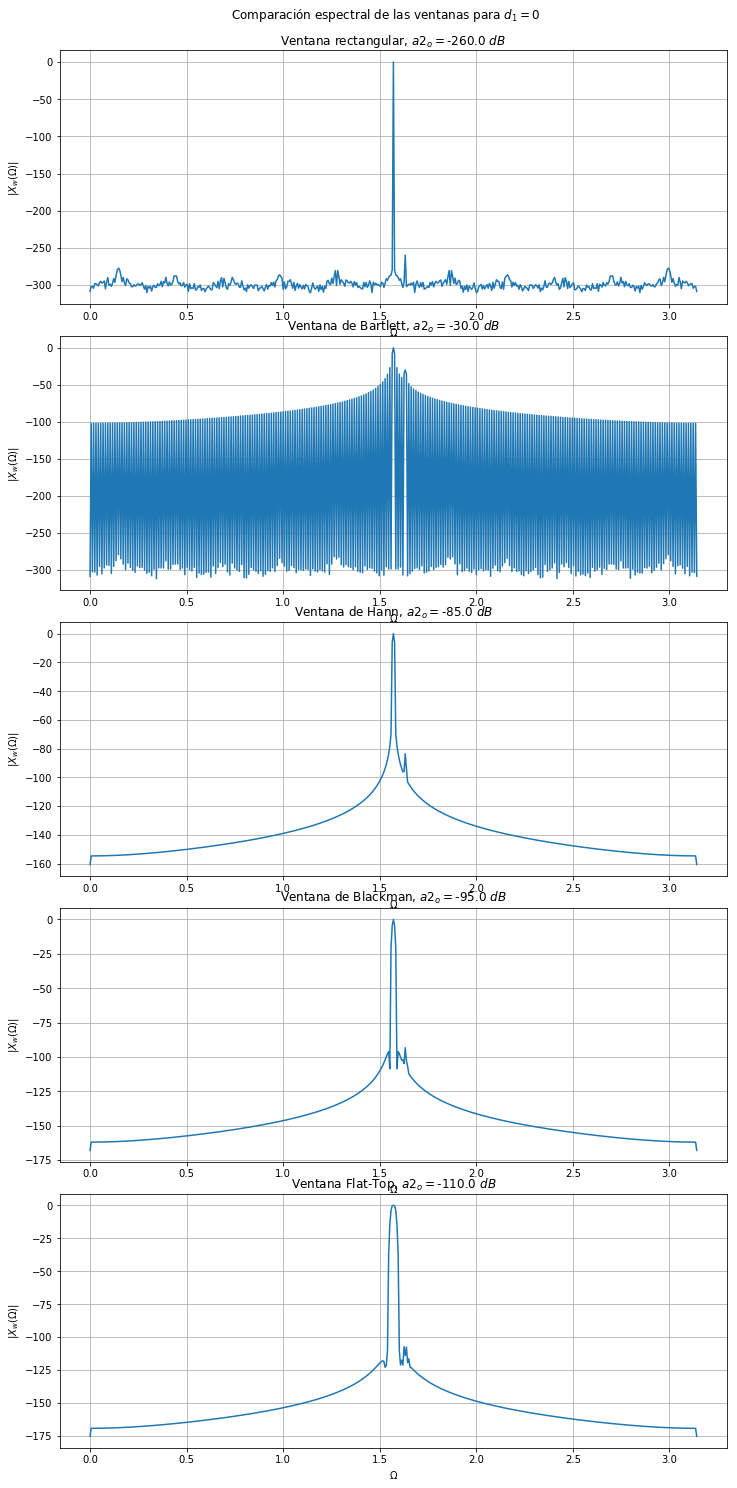

In [112]:
#######################################
# Presentación gráfica de resultados  #
#######################################


plt.figure()
fig, axarr = plt.subplots(5, 1,figsize = (10,20)) 
fig.suptitle('Comparación espectral de las ventanas para $d_{1} = $' + str(d1),fontsize=12,y = 1.02)
fig.tight_layout()

axarr[0].plot(f,Xw[0])
axarr[0].set_ylabel('$|X_{w}(\Omega)|$')
axarr[0].set_xlabel('$\\Omega$')
axarr[0].set_title('Ventana rectangular, $a2_{o} = $' + str(a20[0]) + ' $dB$')
axarr[0].axis('tight')
axarr[0].grid()

axarr[1].plot(f,Xw[1])
axarr[1].set_ylabel('$|X_{w}(\Omega)|$')
axarr[1].set_xlabel('$\\Omega$')
axarr[1].set_title('Ventana de Bartlett, $a2_{o} = $' + str(a20[1]) + ' $dB$')
axarr[1].axis('tight')
axarr[1].grid()

axarr[2].plot(f,Xw[2])
axarr[2].set_ylabel('$|X_{w}(\Omega)|$')
axarr[2].set_xlabel('$\\Omega$')
axarr[2].set_title('Ventana de Hann, $a2_{o} = $' + str(a20[2]) + ' $dB$')
axarr[2].axis('tight')
axarr[2].grid()

axarr[3].plot(f,Xw[3])
axarr[3].set_ylabel('$|X_{w}(\Omega)|$')
axarr[3].set_xlabel('$\\Omega$')
axarr[3].set_title('Ventana de Blackman, $a2_{o} = $' + str(a20[3]) + ' $dB$')
axarr[3].axis('tight')
axarr[3].grid()

axarr[4].plot(f,Xw[4])
axarr[4].set_ylabel('$|X_{w}(\Omega)|$')
axarr[4].set_xlabel('$\\Omega$')
axarr[4].set_title('Ventana Flat-Top, $a2_{o} = $' + str(a20[4]) + ' $dB$')
axarr[4].axis('tight')
axarr[4].grid()

In [113]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

#Listas en las que se almacenaran los resultados

a21 = []
Xw1 = []

#Genero las ventanas

wr = win.rectangular(N)
wt = win.bartlett(N)
whn = win.hann(N)
wb = win.blackman(N)
wft = win.flattop(N)

w = [wr,wt,whn,wb,wft]

#Parametros de x1(t)
a1 = 1
fo = np.pi/2
p1 = 0
d1 = 0.5
f1 = d1*((2*np.pi)/N) + fo

#Generación de la ventana x1(t)
(t,x1) = generador.sinewave(a1,f1,p1,freq = 'normalized_frequency')

#Parametros de x2(t)
#Se genera a partir de un parametro k1 que indica cuantos dB por debajo estará de x1(t)
k1 = [30,50,60,70,80]
f2 = fo + 10*((2*np.pi)/N)
p2 = 0

#Para cada una de las ventanas y el a2o correspondiente a esa ventana
for wi,k1i in zip(w,k1):
    
    a2oi = (np.power(10,-k1i/20))
    a2i = a1*a2oi
    
    #Generación de la ventana x2(t)
    (t,x2i) = generador.sinewave(a2i,f2,p2,freq = 'normalized_frequency')
    
    #Generacion de x(t)
    xi = x1 + x2i
    
    #Multiplicacion por la ventana correspondiente
    xwi = xi*wi
    
    #Espectro de la nueva x(t) para esta desintonia
    (f,Xwi) = analizador.module(xwi,db = True,xaxis = 'phi')
    #Agrego el espectro actual a la lista de resultados
    Xw1.append(Xwi)
    a21.append(20*np.log10(a2i))
    

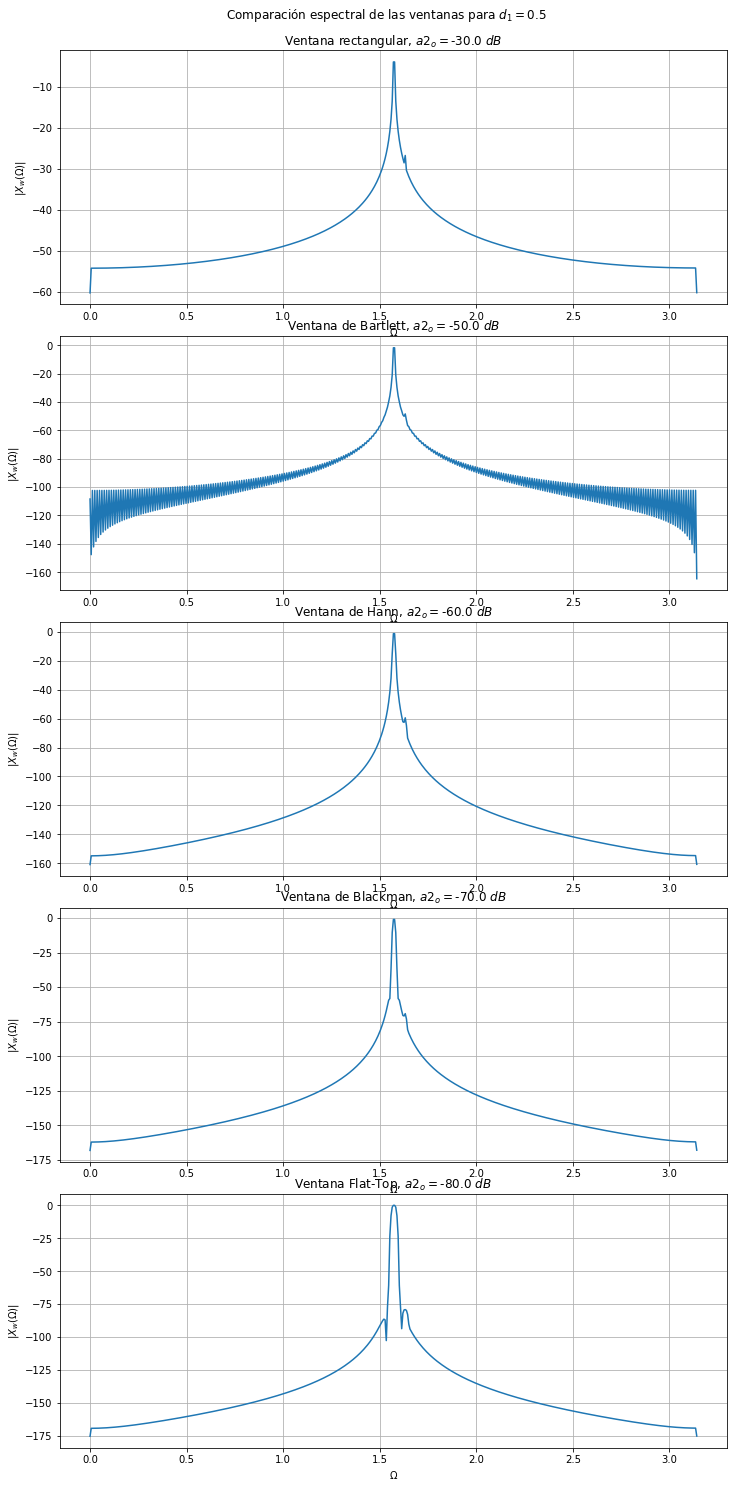

In [114]:
#######################################
# Presentación gráfica de resultados  #
#######################################


plt.figure()
fig, axarr = plt.subplots(5, 1,figsize = (10,20)) 
fig.suptitle('Comparación espectral de las ventanas para $d_{1} = $' + str(d1),fontsize=12,y = 1.02)
fig.tight_layout()

axarr[0].plot(f,Xw1[0])
axarr[0].set_ylabel('$|X_{w}(\Omega)|$')
axarr[0].set_xlabel('$\\Omega$')
axarr[0].set_title('Ventana rectangular, $a2_{o} = $' + str(a21[0]) + ' $dB$')
axarr[0].axis('tight')
axarr[0].grid()

axarr[1].plot(f,Xw1[1])
axarr[1].set_ylabel('$|X_{w}(\Omega)|$')
axarr[1].set_xlabel('$\\Omega$')
axarr[1].set_title('Ventana de Bartlett, $a2_{o} = $' + str(a21[1]) + ' $dB$')
axarr[1].axis('tight')
axarr[1].grid()

axarr[2].plot(f,Xw1[2])
axarr[2].set_ylabel('$|X_{w}(\Omega)|$')
axarr[2].set_xlabel('$\\Omega$')
axarr[2].set_title('Ventana de Hann, $a2_{o} = $' + str(a21[2]) + ' $dB$')
axarr[2].axis('tight')
axarr[2].grid()

axarr[3].plot(f,Xw1[3])
axarr[3].set_ylabel('$|X_{w}(\Omega)|$')
axarr[3].set_xlabel('$\\Omega$')
axarr[3].set_title('Ventana de Blackman, $a2_{o} = $' + str(a21[3]) + ' $dB$')
axarr[3].axis('tight')
axarr[3].grid()

axarr[4].plot(f,Xw1[4])
axarr[4].set_ylabel('$|X_{w}(\Omega)|$')
axarr[4].set_xlabel('$\\Omega$')
axarr[4].set_title('Ventana Flat-Top, $a2_{o} = $' + str(a21[4]) + ' $dB$')
axarr[4].axis('tight')
axarr[4].grid()

In [115]:
tus_resultados = []
for a20i,a21i in zip(a20,a21):
    tus_resultados.append([str(a20i),str(a21i)])

In [116]:

#######################################
# Tu simulación que genere resultados #
#######################################
df = DataFrame(tus_resultados, columns=['$a^0_2$ (dB)','$a^1_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$a^0_2$ (dB),$a^1_2$ (dB)
Rectangular,-260.0,-30.0
Bartlett,-30.0,-50.0
Hann,-85.0,-60.0
Blackman,-95.0,-70.0
Flat-top,-110.0,-80.0


Del experimento anterior pueden sacarse las siguientes conclusiones:
 
+ Si se tiene muestreo sincrónico, de forma que:

\begin{equation}
 \Omega_{o} = k\frac{2 \pi}{N}, 0 \leq k \leq N-1 
\end{equation}

+ Se observa que la ventana rectangular es la mejor ventana para detectar la existencia de componentes espectrales de baja amplitud, le sigue la ventana Flat-Top. También se observa que la ventana de Bartlett es la peor ventana para este caso. Por lo tanto, para este caso, es conveniente no ventanear.
    
+ Si se tiene desintonia, de forma que:

\begin{equation}
 \Omega_{o} \neq k\frac{2 \pi}{N}, 0 \leq k \leq N-1 
\end{equation}

+ Se observa que la ventana rectangular es la peor para detectar la existencia de componentes espectrales, siendo la mejor la Flat-Top. Por lo que se ve que para estos casos conviene ventanear.

+ Las ventanas Flat-Top es la mejor para detectar componentes de baja amplitud debido a la baja amplitud de sus lóbulos secundarios. Por otra parte, si bien permite detectarlas, no es una ventana adecuada para estimar con precision la localización en frecuencia debido a su gran ancho de banda, que produce un gran desparramo de energía en torno a las componentes.

+ Por otro lado la ventana de Bartlett es, en general, la peor para detectar la presencia de componentes secundarias pero permite una mejor estimación de la localización en frecuencia.




<div class="alert alert-block alert-info">
<b>2.e)</b> Para las ventanas analizadas en 1), decida cuál sería la más apropiada en el caso que, <b>sin afectar otro parámetro</b>, $\Omega_2$ pudiera acercarse libremente a $\Omega_1 = \frac{\pi}{2} + 0.5·\frac{2\pi}{N}$. Complete la siguiente tabla con la distancia mínima, $\Omega_0, $ a la que se puede distinguir $x_2$ en $\lvert X_w(\Omega) \rvert$.
</div>

In [120]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

#Listas en las que se almacenaran los resultados

f0 = []
Xw = []

#Genero las ventanas

wr = win.rectangular(N)
wt = win.bartlett(N)
whn = win.hann(N)
wb = win.blackman(N)
wft = win.flattop(N)

w = [wr,wt,whn,wb,wft]

#Parametros de x1(t)
a1 = 1
p1 = 0
f1o = ((np.pi)/2)
f1 = 0.5*((2*np.pi)/N) + f1o

#Generación de la ventana x1(t)
(t,x1) = generador.sinewave(a1,f1,p1,freq = 'normalized_frequency')

#Parametros de x2(t)
#Se genera a partir de un parametro k1 que indica cuantos dB por debajo estará de x1(t)
k1 = 20
a2o = (np.power(10,-k1/20))
a2 = a1*a2o
n = [6,5,5,5,8]
p2 = 0

#Para cada una de las ventanas y el a2o correspondiente a esa ventana
for wi,ni in zip(w,n):
    
    f2i = f1o + ni*((2*np.pi)/N)
    
    #Generación de la ventana x2(t)
    (t,x2i) = generador.sinewave(a2,f2i,p2,freq = 'normalized_frequency')
    
    #Generacion de x(t)
    xi = x1 + x2i
    
    #Multiplicacion por la ventana correspondiente
    xwi = xi*wi
    
    #Espectro de la nueva x(t) para esta desintonia
    (f,Xwi) = analizador.module(xwi,db = True,xaxis = 'phi')
    #Agrego el espectro actual a la lista de resultados
    Xw.append(Xwi)
    f0.append(ni)

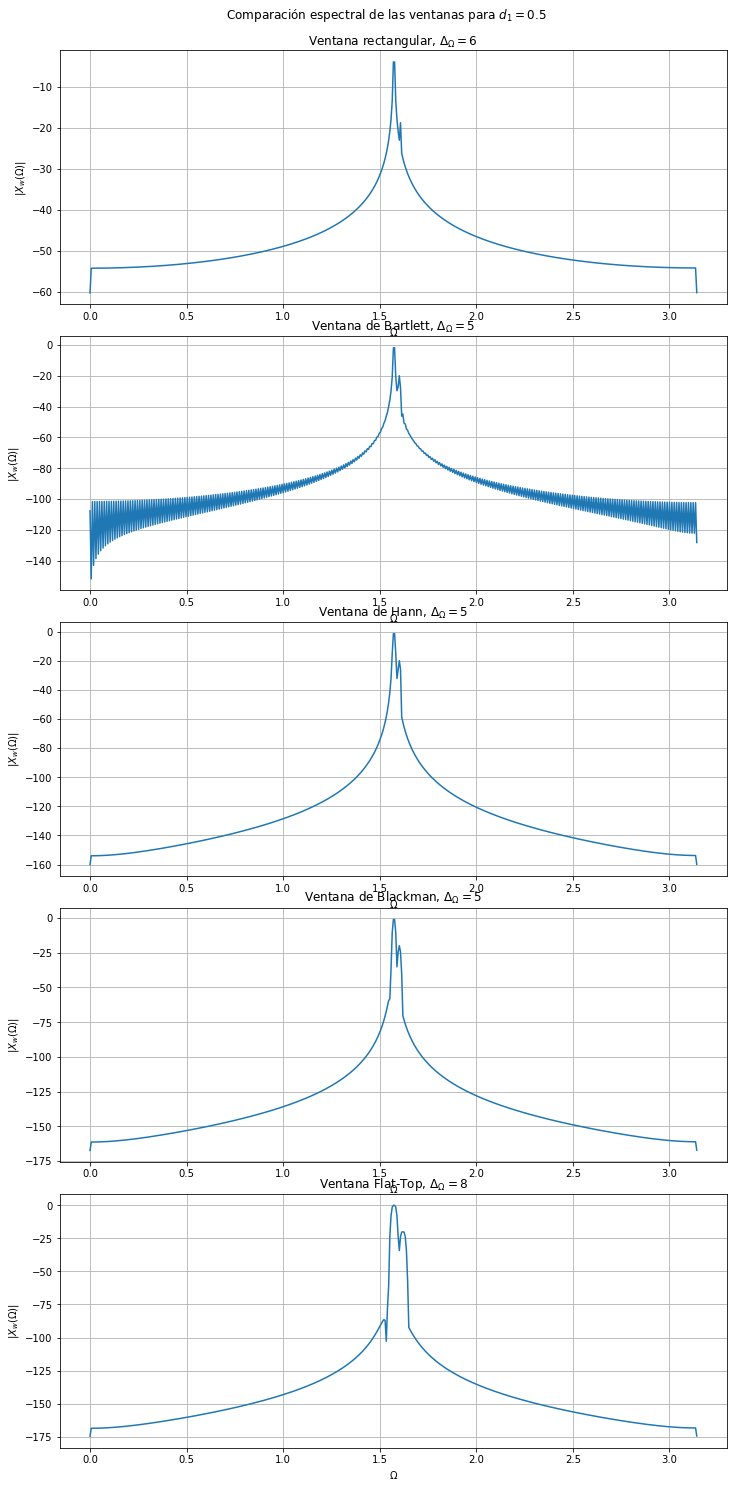

In [121]:
plt.figure()
fig, axarr = plt.subplots(5, 1,figsize = (10,20)) 
fig.suptitle('Comparación espectral de las ventanas para $d_{1} = $' + str(d1),fontsize=12,y = 1.02)
fig.tight_layout()

axarr[0].plot(f,Xw[0])
axarr[0].set_ylabel('$|X_{w}(\Omega)|$')
axarr[0].set_xlabel('$\\Omega$')
axarr[0].set_title('Ventana rectangular, $\Delta_{\Omega} = ' + str(n[0]) + '\frac{2 \pi}{N}$')
axarr[0].axis('tight')
axarr[0].grid()

axarr[1].plot(f,Xw[1])
axarr[1].set_ylabel('$|X_{w}(\Omega)|$')
axarr[1].set_xlabel('$\\Omega$')
axarr[1].set_title('Ventana de Bartlett, $\Delta_{\Omega} = ' + str(n[1]) + '\frac{2 \pi}{N}$')
axarr[1].axis('tight')
axarr[1].grid()

axarr[2].plot(f,Xw[2])
axarr[2].set_ylabel('$|X_{w}(\Omega)|$')
axarr[2].set_xlabel('$\\Omega$')
axarr[2].set_title('Ventana de Hann, $\Delta_{\Omega} = ' + str(n[2]) + '\frac{2 \pi}{N}$')
axarr[2].axis('tight')
axarr[2].grid()

axarr[3].plot(f,Xw[3])
axarr[3].set_ylabel('$|X_{w}(\Omega)|$')
axarr[3].set_xlabel('$\\Omega$')
axarr[3].set_title('Ventana de Blackman, $\Delta_{\Omega} = ' + str(n[3]) + '\frac{2 \pi}{N}$')
axarr[3].axis('tight')
axarr[3].grid()

axarr[4].plot(f,Xw[4])
axarr[4].set_ylabel('$|X_{w}(\Omega)|$')
axarr[4].set_xlabel('$\\Omega$')
axarr[4].set_title('Ventana Flat-Top, $\Delta_{\Omega} = ' + str(n[4]) + '\frac{2 \pi}{N}$')
axarr[4].axis('tight')
axarr[4].grid()

In [122]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = []

for ni in n:
    tus_resultados.append(str(ni))

df = DataFrame(tus_resultados, columns=['$\Omega_0$ (#)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$\Omega_0$ (#)
Rectangular,6
Bartlett,5
Hann,5
Blackman,5
Flat-top,8


Del experimento anterior pueden sacarse las siguientes conclusiones:

+ Se observa que si se tiene una componente secundaria de baja amplitud cercana a la componente principal, la ventana Flat-Top es solo útil para detectar su existencia pero no para distinguirla de la componente principal. Se observa que las ventanas de Bartlett, de Hann, de Blackman y rectangular tienen un rendimiento mejor a la hora de distinguir entre componentes cercanas.

+ En términos generales, las mejores son las ventanas de Blackman y de Hann, ya que permiten detectar la amplitud de componentes secundarias relativamente pequeñas y distinguir entre componentes cercanas. Por otra parte, la ventana de Bartlett es mala para detectar la existencia de componentes espectrales secundarias.

+ La ventana rectangular es buena para distinguir componentes espectrales cercanas pero su capacidad para reconocer la amplitud de las componentes secundarias se fuertemente degradada si no se puede asegurar muestreo sincrónico, lo cual ocurre en la mayoría de las aplicaciones.    

<div class="alert alert-block alert-info">
<b>3)</b> Genere la siguiente señal 

</div>

  $  x(k) = a_0·\mathop{sen}(\Omega_1·k)$


siendo 

  $a_0 = 2$

  $\Omega_1 = \Omega_0 + f_r·\frac{2\pi}{N} $

  $\Omega_0 = \frac{\pi}{2} $
  
y la variable aleatoria definida por

  $f_r \sim \mathcal{U}(-2, \, 2) $

Considere 200 realizaciones para cada experimento requerido en los siguiente incisos.incisos.


In [127]:
#############################################################################
# Importación de paquetes necesarios para la realización del ejercicio # 3  #
#############################################################################

import numpy as np
import matplotlib.pyplot as plt

import pdsmodulos.signal_generator as gen
import pdsmodulos.spectrum_analyzer as sa
import pdsmodulos.statistic as sta
import pdsmodulos.adc as converter
import pdsmodulos.windows as win

#Paquete para manejo de datos
from pandas import DataFrame
from IPython.display import HTML

In [128]:
#Parametros del muestreo
N = 1024
fs = 1024

#Tamaño del montecarlo
S = 200

#Limites de la distribucion de fr
l1 = -2
l2 = 2

#Amplitud
Ao = 2*np.ones((S,1),dtype = float)

#Fase
Po = np.zeros((S,1),dtype = float)

#Frecuencia central
fo = (np.pi/2)

#Fr sera una variable aleatoria de distribucion uniforme entre -2 y 2
#Genero 200 realizaciones de fr
fr = np.random.uniform(l1,l2,S).reshape(S,1)

#Genero 200 realizaciones de f1
f1 = fo + fr*((2*np.pi)/N)

#Enciendo el generador de funciones
generador = gen.signal_generator(fs,N)

#Genero 200 realizaciones de x
(t,x) = generador.sinewave(Ao,f1,Po,freq='normalized_frequency')

<div class="alert alert-block alert-info">
<b>3.a)</b> Calcule experimentalmente el sesgo y la varianza del siguiente estimador:
</div>

 
  $ \hat{a_0} = \lvert X^i_w(\Omega_0) \rvert$
  
siendo

  $\lvert X^i_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w_i(k) \} \rvert $ 
  
para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

El sesgo y la varianza se definen para este caso como

  $ s_a = \mathop{E}\{ \hat{a_0}\} - a_0  $
    
  $ v_a = \mathop{var} \{ \hat{a_0} \} = \mathop{E}\{ ( \hat{a_0} - \mathop{E} \{ \hat{a_0} \} )^2 \} $
  
y pueden aproximarse cuando consideramos los valores esperados como las medias muestrales ($a=a_0$ para simplificar la notación)

  $ \mathop{E}\{ \hat{a_0}\}  = \hat{\mu_a} =  \frac{1}{M} \sum^{M-1}_{j=0} \hat{a_{j}} $
  
  $ s_a = \hat{\mu_a} - a  $
    
  $ v_a = \frac{1}{M} \sum^{M-1}_{j=0} (\hat{a_{j}} - \hat{\mu_a})^2 $



Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

In [129]:
#Genero las ventanas

wr = win.rectangular(N)
wt = win.bartlett(N)
whn = win.hann(N)
wb = win.blackman(N)
wft = win.flattop(N)

w = [wr,wt,whn,wb,wft]

#Lista donde se almacenaran los resultados

s = []
v = []
Ao_est = []

#Inicializo el analizador de espectro
analizador = sa.spectrum_analyzer(fs,N)

#Para cada ventana
for wi in w:
    
    #Se computara este estimador en cada realizacion del montecarlo
    Ao_estimador = np.array([],dtype='float').reshape(1,0)
    
    #Se realiza el montecarlo
    for i in range(0,S):

        xi = x[:,i].reshape(N,1)

        xi = xi*wi

        #Obtengo el espectro para las i esima realizacion de x
        (f,Xi) = analizador.module(xi)

        #Calculo una realizacion del estimador
        Aoi_estimador = Xi[int(fo/((2*np.pi)/N))].reshape(1,1)

        #Lo adjunto a los resultados
        Ao_estimador = np.hstack([Ao_estimador, Aoi_estimador])
        
    #Computo el sesgo y la varianza del estimador para la ventana actual
    si = np.mean(Ao_estimador) - Ao[0,0]    
    vi = np.mean(np.power(Ao_estimador-np.mean(Ao_estimador),2))
    
    #Se agregan los resultados de la ventana actual a los resultados de todas las ventanas
    s.append(si)
    v.append(vi)
    Ao_est.append(Ao_estimador)

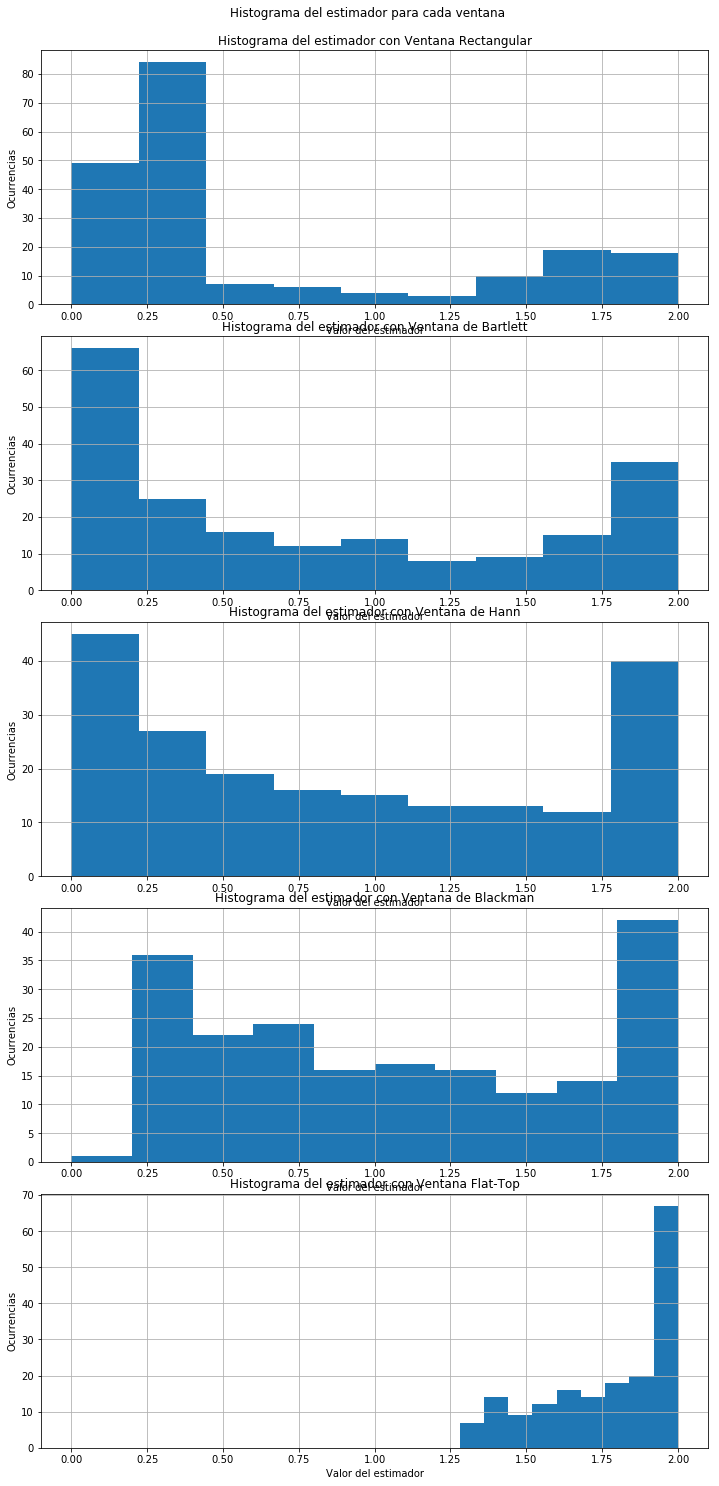

In [130]:
######################################
# Presentación gráfica de resultados #
######################################

fig, axarr = plt.subplots(5, 1,figsize = (10,20)) 
fig.suptitle('Histograma del estimador para cada ventana',fontsize=12,y = 1.02)
fig.tight_layout()

axarr[0].hist(np.transpose(Ao_est[0]),range = (0,2),bins = 'auto')
axarr[0].set_title('Histograma del estimador con Ventana Rectangular')
axarr[0].set_ylabel('Ocurrencias')
axarr[0].set_xlabel('Valor del estimador')
axarr[0].axis('tight')
axarr[0].grid()

axarr[1].hist(np.transpose(Ao_est[1]),range = (0,2),bins = 'auto')
axarr[1].set_title('Histograma del estimador con Ventana de Bartlett')
axarr[1].set_ylabel('Ocurrencias')
axarr[1].set_xlabel('Valor del estimador')
axarr[1].axis('tight')
axarr[1].grid()

axarr[2].hist(np.transpose(Ao_est[2]),range = (0,2),bins = 'auto')
axarr[2].set_title('Histograma del estimador con Ventana de Hann')
axarr[2].set_ylabel('Ocurrencias')
axarr[2].set_xlabel('Valor del estimador')
axarr[2].axis('tight')
axarr[2].grid()

axarr[3].hist(np.transpose(Ao_est[3]),range = (0,2),bins = 'auto')
axarr[3].set_title('Histograma del estimador con Ventana de Blackman')
axarr[3].set_ylabel('Ocurrencias')
axarr[3].set_xlabel('Valor del estimador')
axarr[3].axis('tight')
axarr[3].grid()

axarr[4].hist(np.transpose(Ao_est[4]),range = (0,2),bins = 'auto')
axarr[4].set_title('Histograma del estimador con Ventana Flat-Top')
axarr[4].set_ylabel('Ocurrencias')
axarr[4].set_xlabel('Valor del estimador')
axarr[4].axis('tight')
axarr[4].grid()

In [131]:
tus_resultados = []

for si,vi in zip(s,v):
    tus_resultados.append([str(si),str(vi)])

In [132]:

#######################################
# Tu simulación que genere resultados #
#######################################

df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$
Rectangular,-1.34130926404,0.389070896514
Bartlett,-1.20313072819,0.506958523935
Hann,-1.08852047222,0.471868522977
Blackman,-0.92440536057,0.368129942141
Flat-top,-0.199614381127,0.0452267994545


Del experimento anterior podemos ver que ventanear la señal reduce el sesgo del estimador.

<div class="alert alert-block alert-info">
<b>3.b)</b> Repita a) para el siguiente estimador:
</div>

 
  $ \hat{a_1} = \sqrt{\frac{1}{5}·\sum_{j=a}^{b} \lvert X^i_w(j) \rvert ^2} $
  
siendo $ a = \Omega_0 - 2·\frac{2\pi}{N} $ y $ b = \Omega_0 + 2·\frac{2\pi}{N} $

para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

In [142]:
#Genero las ventanas

wr = win.rectangular(N)
wt = win.bartlett(N)
whn = win.hann(N)
wb = win.blackman(N)
wft = win.flattop(N)

w = [wr,wt,whn,wb,wft]

#Lista donde se almacenaran los resultados

s = []
v = []
Ao_est = []

#Inicializo el analizador de espectro
analizador = sa.spectrum_analyzer(fs,N)

#Para cada ventana
for wi in w:
    
    #Se computara este estimador en cada realizacion del montecarlo
    Ao_estimador = np.array([],dtype='float').reshape(1,0)
    
    #Se realiza el montecarlo
    for i in range(0,S):

        xi = x[:,i].reshape(N,1)

        xi = xi*wi

        #Obtengo el espectro para las i esima realizacion de x
        (f,Xi) = analizador.module(xi)
        #Divide por dos todas las componentes menos continua y Nyquist
        n = np.size(Xi,0)
        for j in range(0,n):
            if (j is not 0) and (j is not (n-1)):
                Xi[j] = Xi[j]/2
                Xi[j] = np.power(Xi[j],2)
                Xi[j] = Xi[j]*2
            else:
                Xi[j] = np.power(Xi[j],2)
        #Calculo una realizacion del estimador
        aux = (Xi[((int(fo/((2*np.pi)/N))) - 2):((int(fo/((2*np.pi)/N))) + 3)])
        Aoi_estimador = np.sqrt(np.sum(aux)/5).reshape(1,1)

        #Lo adjunto a los resultados
        Ao_estimador = np.hstack([Ao_estimador, Aoi_estimador])
        
    #Computo el sesgo y la varianza del estimador para la ventana actual
    si = np.mean(Ao_estimador) - np.sqrt(2)    
    vi = np.mean(np.power(Ao_estimador-np.mean(Ao_estimador),2))
    
    #Se agregan los resultados de la ventana actual a los resultados de todas las ventanas
    s.append(si)
    v.append(vi)
    Ao_est.append(Ao_estimador)


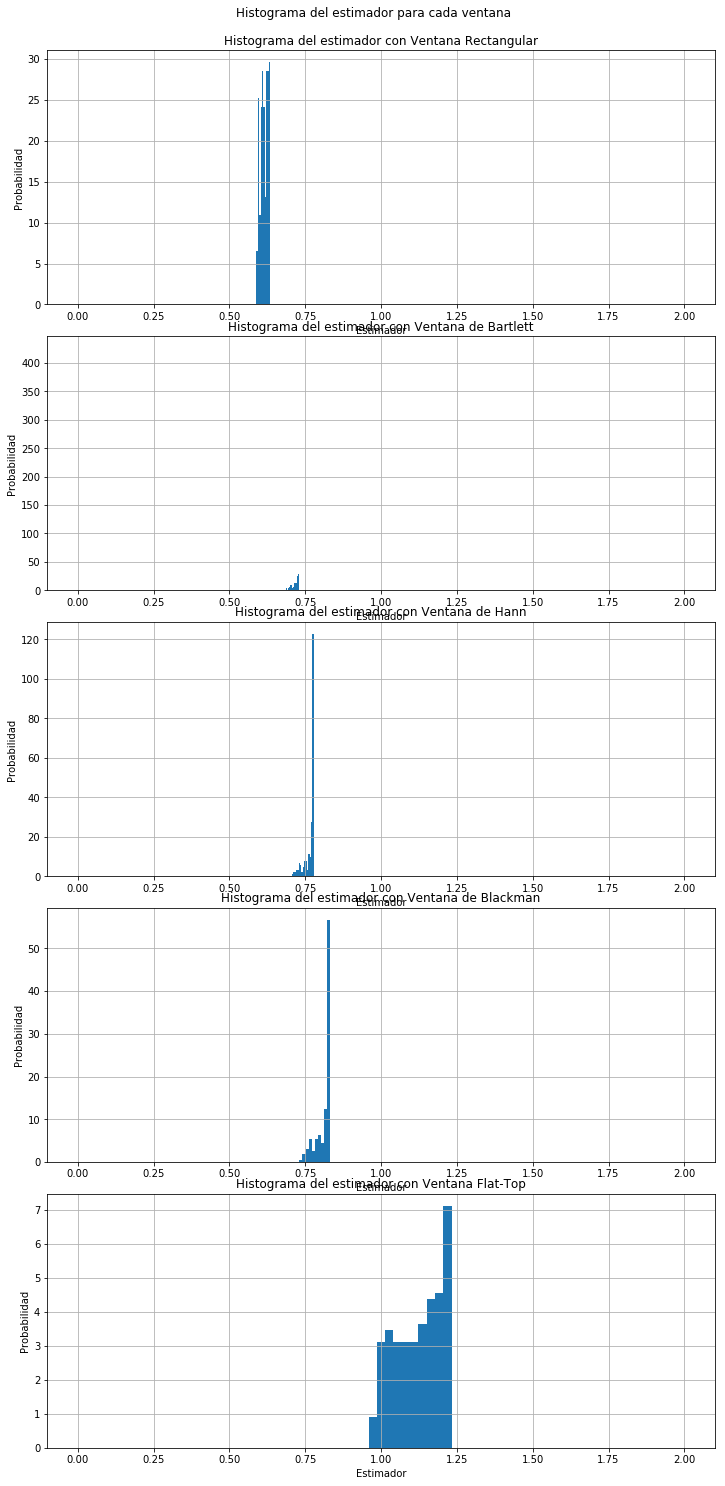

In [143]:
######################################
# Presentación gráfica de resultados #
######################################

fig, axarr = plt.subplots(5, 1,figsize = (10,20)) 
fig.suptitle('Histograma del estimador para cada ventana',fontsize=12,y = 1.02)
fig.tight_layout()

axarr[0].hist(np.transpose(Ao_est[0]),range = (0,2),bins = 'auto',normed = True)
axarr[0].set_title('Histograma del estimador con Ventana Rectangular')
axarr[0].set_ylabel('Probabilidad')
axarr[0].set_xlabel('Estimador')
axarr[0].axis('tight')
axarr[0].grid()

axarr[1].hist(np.transpose(Ao_est[1]),range = (0,2),bins = 'auto',normed = True)
axarr[1].set_title('Histograma del estimador con Ventana de Bartlett')
axarr[1].set_ylabel('Probabilidad')
axarr[1].set_xlabel('Estimador')
axarr[1].axis('tight')
axarr[1].grid()

axarr[2].hist(np.transpose(Ao_est[2]),range = (0,2),bins = 'auto',normed = True)
axarr[2].set_title('Histograma del estimador con Ventana de Hann')
axarr[2].set_ylabel('Probabilidad')
axarr[2].set_xlabel('Estimador')
axarr[2].axis('tight')
axarr[2].grid()

axarr[3].hist(np.transpose(Ao_est[3]),range = (0,2),bins = 'auto',normed = True)
axarr[3].set_title('Histograma del estimador con Ventana de Blackman')
axarr[3].set_ylabel('Probabilidad')
axarr[3].set_xlabel('Estimador')
axarr[3].axis('tight')
axarr[3].grid()

axarr[4].hist(np.transpose(Ao_est[4]),range = (0,2),bins = 'auto',normed = True)
axarr[4].set_title('Histograma del estimador con Ventana Flat-Top')
axarr[4].set_ylabel('Probabilidad')
axarr[4].set_xlabel('Estimador')
axarr[4].axis('tight')
axarr[4].grid()

In [144]:
tus_resultados = []

for si,vi in zip(s,v):
    tus_resultados.append([str(si),str(vi)])

In [145]:

#######################################
# Tu simulación que genere resultados #
#######################################

df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$
Rectangular,-0.799388343357,0.000154281763468
Bartlett,-0.690060291201,9.84459088251e-05
Hann,-0.648933082425,0.000263442006458
Blackman,-0.600607648808,0.000594586438167
Flat-top,-0.291966314431,0.00549931589748


Se observa, que promediar tiende a disminuir la varianza del estimador.